In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
redwinedata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = None)
ones = pd.DataFrame(np.ones((len(redwinedata), 1)), columns=['class'])
red_data = pd.concat((redwinedata, ones), axis=1)

whitewinedata = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = None)
zeros = pd.DataFrame(np.zeros((len(whitewinedata), 1)), columns=['class'])
white_data = pd.concat((whitewinedata, zeros), axis=1)

print(len(red_data))
print(len(white_data))

/Users/Cam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


1599
4898


/Users/Cam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """


In [3]:
data = red_data.append(white_data)
data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  class  
0         9.4        5    1.0  
1         9.8        5    1.0  
2         9.8        5    1.0  
3         9.8        6    1.0  
4         9.4        5    1.0  
...       ...      ...    ...  
4893     11.2        6    0.0  
4894      9.6        5    0.0  
4895      9.4        6    0.0  
4896     12.8        7    0.0  
4897     11.8        6    0.0  

[6497 rows x 13 columns]

In [4]:
y = data.iloc[0:5000, 12].values
# extracting the first 100 values purely because data set is organized conveniently - in first 100, first 50 is one class and second 50 is another class

y = np.where(y > 0, 1, -1)
# every element in our array that is red wine (class=1), set it to 1, otherwise -1

X = data.iloc[0:5000, 0:11].values
# this is now extracting the features which are column . and .

y

array([ 1,  1,  1, ..., -1, -1, -1])

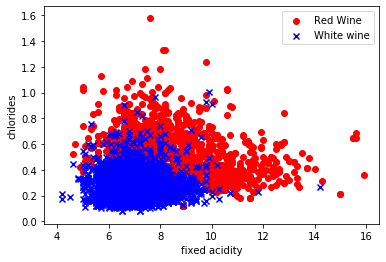

In [5]:
%matplotlib inline

plt.scatter(X[:1599, 0], X[:1599, 1], c='r', marker='o', label='Red Wine')
# first 1599 values in first feature and second feature = red
plt.scatter(X[1600:5000, 0], X[1600:5000, 1], c='b', marker='x', label='White wine')
# values 1600-5000 = white

plt.xlabel('fixed acidity')
plt.ylabel('chlorides')

plt.legend()

plt.show()

In [6]:
X = X / np.linalg.norm(X)
# X over the norm of X - changing the scale to unit length

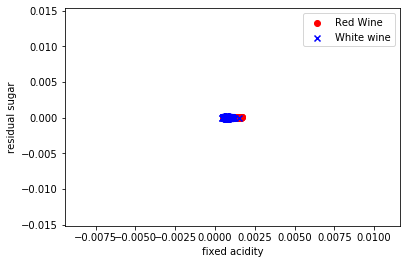

In [7]:
plt.scatter(X[:1599, 0], X[:1599, 1], c='r', marker='o', label='Red Wine')
# first 1599 values in first feature and second feature = red
plt.scatter(X[1600:5000, 0], X[1600:5000, 1], c='b', marker='x', label='White wine')
# values 1600-5000 = white

plt.xlabel('fixed acidity')
plt.ylabel('residual sugar')

plt.legend()

plt.show()

In [19]:
# implemenitng the perecptron algorithm

w = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for t in range(8000):
# 10 iterations    
    
    num_errors = 0
    # reset num_errors count after each loop
    for xi, label in zip(X, y):
    # in each iteration we loop over all of the data    
        dp = np.dot(xi, w)
        # dot product of our weights and features is going to be a scalar
        
        if dp > 0.0:
        # if this scalar is greater than 0    
            prediction = 1
        else:
            prediction = -1
        
        if prediction == 1 and label != 1:
        # deciding if we have made a mistake, if we have, we want to update our weights.    
        # if prediction = 1 and label does not = 1 ...    
            w -= xi
            # we want to subtract this prediction from our weights
            num_errors += 1
            # adding 1 to num_errors count
        elif prediction == -1 and label != -1:
        # else if prediction = -1 and label does not = -1...    
            w += xi
            # add this prediction to our weight vector (i.e we want to make our weights more like this current example)
            num_errors += 1
            # add 1 to num_errors count
            
    print("Iteration %i - Num.errors: %i - Weights: [%f %f %f %f %f %f %f %f %f %f %f]" % (t, num_errors, w[0], w[1], w[2], w[3], w[4], w[5], w[6], w[7], w[8], w[9], w[10]))
    # add some information: print iteration no. - no. of errors - weights
    
import time
start_time = time.time()
print("--- %s seconds ---" % (time.time() - start_time))
    

Iteration 0 - Num.errors: 2 - Weights: [0.000043 0.000046 -0.000038 -0.002010 0.000003 -0.003635 -0.014540 -0.000000 0.000055 0.000012 0.000064]
Iteration 1 - Num.errors: 4 - Weights: [0.001753 0.000267 -0.000073 -0.003496 0.000027 -0.002993 -0.016143 0.000212 0.000800 0.000166 0.002224]
Iteration 2 - Num.errors: 4 - Weights: [0.003464 0.000489 -0.000107 -0.004982 0.000051 -0.002352 -0.017747 0.000425 0.001545 0.000320 0.004383]
Iteration 3 - Num.errors: 6 - Weights: [0.005281 0.000722 -0.000149 -0.006746 0.000081 -0.000641 -0.006094 0.000639 0.002278 0.000493 0.006211]
Iteration 4 - Num.errors: 3 - Weights: [0.006158 0.000862 -0.000187 -0.008478 0.000095 -0.001604 -0.013471 0.000745 0.002675 0.000577 0.007323]
Iteration 5 - Num.errors: 4 - Weights: [0.007836 0.001055 -0.000187 -0.009558 0.000116 -0.000748 -0.009943 0.000958 0.003430 0.000747 0.009558]
Iteration 6 - Num.errors: 3 - Weights: [0.008713 0.001195 -0.000226 -0.011290 0.000130 -0.001711 -0.017319 0.001064 0.003826 0.000832 0

Iteration 63 - Num.errors: 10 - Weights: [0.033452 0.011842 -0.006128 -0.058982 0.001411 0.010905 -0.025658 0.003591 0.016704 0.008392 0.020740]
Iteration 64 - Num.errors: 10 - Weights: [0.033570 0.012063 -0.006266 -0.058982 0.001437 0.011439 -0.026086 0.003593 0.016793 0.008552 0.020452]
Iteration 65 - Num.errors: 9 - Weights: [0.034735 0.012273 -0.006350 -0.058907 0.001467 0.010477 -0.024803 0.003702 0.017222 0.008753 0.021115]
Iteration 66 - Num.errors: 10 - Weights: [0.034852 0.012493 -0.006488 -0.058907 0.001493 0.011012 -0.025231 0.003704 0.017312 0.008912 0.020826]
Iteration 67 - Num.errors: 10 - Weights: [0.034970 0.012714 -0.006626 -0.058907 0.001519 0.011546 -0.025658 0.003706 0.017402 0.009071 0.020537]
Iteration 68 - Num.errors: 10 - Weights: [0.035088 0.012934 -0.006764 -0.058907 0.001545 0.012081 -0.026086 0.003709 0.017491 0.009231 0.020249]
Iteration 69 - Num.errors: 10 - Weights: [0.035205 0.013154 -0.006902 -0.058907 0.001570 0.012615 -0.026514 0.003711 0.017581 0.009

Iteration 127 - Num.errors: 10 - Weights: [0.048398 0.025593 -0.014619 -0.060628 0.003126 0.007056 -0.027155 0.004796 0.027168 0.019222 0.012701]
Iteration 128 - Num.errors: 10 - Weights: [0.048612 0.025790 -0.014756 -0.060660 0.003154 0.005452 -0.028438 0.004799 0.027285 0.019389 0.012305]
Iteration 129 - Num.errors: 10 - Weights: [0.048516 0.026007 -0.014907 -0.060692 0.003180 0.006201 -0.027369 0.004801 0.027437 0.019561 0.012081]
Iteration 130 - Num.errors: 10 - Weights: [0.048419 0.026224 -0.015059 -0.060725 0.003206 0.006949 -0.026300 0.004803 0.027589 0.019733 0.011856]
Iteration 131 - Num.errors: 10 - Weights: [0.048537 0.026444 -0.015197 -0.060725 0.003232 0.007484 -0.026727 0.004805 0.027679 0.019893 0.011568]
Iteration 132 - Num.errors: 10 - Weights: [0.048654 0.026664 -0.015335 -0.060725 0.003258 0.008018 -0.027155 0.004808 0.027769 0.020052 0.011279]
Iteration 133 - Num.errors: 10 - Weights: [0.048868 0.026861 -0.015472 -0.060757 0.003285 0.006415 -0.028438 0.004810 0.0278

Iteration 193 - Num.errors: 9 - Weights: [0.054171 0.039873 -0.023758 -0.063141 0.004865 0.007163 -0.027476 0.005682 0.037909 0.030440 0.004597]
Iteration 194 - Num.errors: 9 - Weights: [0.054973 0.040107 -0.023850 -0.062724 0.004894 0.006201 -0.027690 0.005791 0.038383 0.030651 0.005581]
Iteration 195 - Num.errors: 10 - Weights: [0.054877 0.040324 -0.024002 -0.062756 0.004920 0.006949 -0.026620 0.005793 0.038534 0.030823 0.005356]
Iteration 196 - Num.errors: 9 - Weights: [0.053647 0.040511 -0.024196 -0.064445 0.004939 0.007056 -0.028010 0.005688 0.038353 0.030925 0.004148]
Iteration 197 - Num.errors: 10 - Weights: [0.053551 0.040728 -0.024348 -0.064477 0.004965 0.007804 -0.026941 0.005690 0.038505 0.031097 0.003924]
Iteration 198 - Num.errors: 10 - Weights: [0.053669 0.040948 -0.024485 -0.064477 0.004991 0.008339 -0.027369 0.005692 0.038594 0.031256 0.003635]
Iteration 199 - Num.errors: 9 - Weights: [0.054470 0.041183 -0.024577 -0.064060 0.005020 0.007377 -0.027583 0.005801 0.039068 0

Iteration 263 - Num.errors: 10 - Weights: [0.054748 0.055071 -0.033464 -0.064253 0.006664 0.007591 -0.027048 0.006570 0.049360 0.042314 -0.000695]
Iteration 264 - Num.errors: 10 - Weights: [0.054502 0.055315 -0.033609 -0.063910 0.006688 0.008125 -0.028972 0.006572 0.049495 0.042483 -0.000663]
Iteration 265 - Num.errors: 10 - Weights: [0.054406 0.055532 -0.033761 -0.063943 0.006714 0.008873 -0.027903 0.006574 0.049647 0.042655 -0.000887]
Iteration 266 - Num.errors: 9 - Weights: [0.055208 0.055766 -0.033853 -0.063526 0.006743 0.007911 -0.028117 0.006682 0.050120 0.042865 0.000096]
Iteration 267 - Num.errors: 10 - Weights: [0.055112 0.055983 -0.034005 -0.063558 0.006770 0.008660 -0.027048 0.006684 0.050272 0.043037 -0.000128]
Iteration 268 - Num.errors: 10 - Weights: [0.055229 0.056203 -0.034143 -0.063558 0.006795 0.009194 -0.027476 0.006687 0.050362 0.043197 -0.000417]
Iteration 269 - Num.errors: 10 - Weights: [0.055347 0.056424 -0.034281 -0.063558 0.006821 0.009729 -0.027903 0.006689 0.

Iteration 332 - Num.errors: 10 - Weights: [0.056021 0.070217 -0.042894 -0.063943 0.008428 0.004704 -0.027690 0.007665 0.061339 0.054068 -0.001443]
Iteration 333 - Num.errors: 10 - Weights: [0.056138 0.070437 -0.043032 -0.063943 0.008454 0.005239 -0.028117 0.007667 0.061429 0.054228 -0.001732]
Iteration 334 - Num.errors: 10 - Weights: [0.056299 0.070613 -0.043150 -0.064017 0.008478 0.006094 -0.027262 0.007669 0.061543 0.054400 -0.001967]
Iteration 335 - Num.errors: 11 - Weights: [0.054845 0.070805 -0.043352 -0.065065 0.008498 0.003635 -0.026941 0.007564 0.061366 0.054514 -0.003026]
Iteration 336 - Num.errors: 10 - Weights: [0.054599 0.071049 -0.043497 -0.064723 0.008522 0.004169 -0.028866 0.007566 0.061501 0.054683 -0.002993]
Iteration 337 - Num.errors: 10 - Weights: [0.054502 0.071266 -0.043649 -0.064755 0.008548 0.004918 -0.027796 0.007568 0.061653 0.054855 -0.003218]
Iteration 338 - Num.errors: 10 - Weights: [0.054406 0.071483 -0.043801 -0.064787 0.008575 0.005666 -0.026727 0.007571 

Iteration 388 - Num.errors: 10 - Weights: [0.051584 0.082429 -0.050757 -0.064167 0.009831 0.009194 -0.028652 0.007990 0.069367 0.063476 -0.006415]
Iteration 389 - Num.errors: 10 - Weights: [0.051488 0.082646 -0.050909 -0.064199 0.009857 0.009943 -0.027583 0.007992 0.069519 0.063649 -0.006639]
Iteration 390 - Num.errors: 9 - Weights: [0.052696 0.082843 -0.050969 -0.063782 0.009885 0.008980 -0.027048 0.008100 0.069953 0.063855 -0.005698]
Iteration 391 - Num.errors: 10 - Weights: [0.052813 0.083063 -0.051107 -0.063782 0.009911 0.009515 -0.027476 0.008103 0.070043 0.064014 -0.005987]
Iteration 392 - Num.errors: 10 - Weights: [0.052931 0.083284 -0.051245 -0.063782 0.009936 0.010049 -0.027903 0.008105 0.070133 0.064173 -0.006276]
Iteration 393 - Num.errors: 9 - Weights: [0.053733 0.083518 -0.051337 -0.063365 0.009965 0.009087 -0.028117 0.008213 0.070606 0.064384 -0.005292]
Iteration 394 - Num.errors: 9 - Weights: [0.054535 0.083752 -0.051429 -0.062948 0.009994 0.008125 -0.028331 0.008321 0.0

Iteration 445 - Num.errors: 9 - Weights: [0.053273 0.094430 -0.058132 -0.064445 0.011238 0.006735 -0.027796 0.008739 0.078047 0.073084 -0.007195]
Iteration 446 - Num.errors: 10 - Weights: [0.053433 0.094605 -0.058250 -0.064520 0.011262 0.007591 -0.026941 0.008741 0.078161 0.073256 -0.007430]
Iteration 447 - Num.errors: 11 - Weights: [0.051979 0.094798 -0.058452 -0.065568 0.011281 0.005132 -0.026620 0.008636 0.077984 0.073371 -0.008489]
Iteration 448 - Num.errors: 9 - Weights: [0.052685 0.095055 -0.058545 -0.065119 0.011308 0.006308 -0.025979 0.008744 0.078430 0.073574 -0.007398]
Iteration 449 - Num.errors: 9 - Weights: [0.051456 0.095242 -0.058738 -0.066808 0.011327 0.006415 -0.027369 0.008639 0.078248 0.073676 -0.008606]
Iteration 450 - Num.errors: 10 - Weights: [0.051616 0.095418 -0.058856 -0.066883 0.011352 0.007270 -0.026514 0.008641 0.078362 0.073848 -0.008841]
Iteration 451 - Num.errors: 9 - Weights: [0.052321 0.095675 -0.058949 -0.066434 0.011379 0.008446 -0.025872 0.008749 0.07

Iteration 502 - Num.errors: 10 - Weights: [0.059078 0.105780 -0.065030 -0.067080 0.012633 0.006308 -0.028010 0.009383 0.085755 0.082533 -0.012124]
Iteration 503 - Num.errors: 10 - Weights: [0.058832 0.106024 -0.065175 -0.066738 0.012657 0.006842 -0.029935 0.009385 0.085890 0.082702 -0.012091]
Iteration 504 - Num.errors: 12 - Weights: [0.058768 0.106205 -0.065301 -0.066172 0.012682 0.005132 -0.027369 0.009387 0.086009 0.082887 -0.012177]
Iteration 505 - Num.errors: 10 - Weights: [0.058522 0.106449 -0.065447 -0.065829 0.012706 0.005666 -0.029293 0.009389 0.086143 0.083056 -0.012145]
Iteration 506 - Num.errors: 10 - Weights: [0.058683 0.106624 -0.065564 -0.065904 0.012730 0.006521 -0.028438 0.009391 0.086258 0.083228 -0.012380]
Iteration 507 - Num.errors: 10 - Weights: [0.058843 0.106799 -0.065682 -0.065979 0.012754 0.007377 -0.027583 0.009393 0.086372 0.083400 -0.012615]
Iteration 508 - Num.errors: 11 - Weights: [0.057389 0.106992 -0.065884 -0.067027 0.012774 0.004918 -0.027262 0.009288 

Iteration 558 - Num.errors: 10 - Weights: [0.054802 0.117546 -0.072425 -0.066033 0.013980 0.009408 -0.029721 0.009807 0.093567 0.091906 -0.013310]
Iteration 559 - Num.errors: 12 - Weights: [0.054812 0.117751 -0.072538 -0.065402 0.014006 0.007056 -0.027583 0.009809 0.093675 0.092088 -0.013310]
Iteration 560 - Num.errors: 10 - Weights: [0.054567 0.117995 -0.072683 -0.065060 0.014030 0.007591 -0.029507 0.009811 0.093810 0.092256 -0.013278]
Iteration 561 - Num.errors: 12 - Weights: [0.054502 0.118176 -0.072810 -0.064493 0.014054 0.005880 -0.026941 0.009813 0.093928 0.092441 -0.013364]
Iteration 562 - Num.errors: 11 - Weights: [0.053305 0.118326 -0.072977 -0.065584 0.014072 0.003528 -0.026834 0.009708 0.093714 0.092556 -0.014433]
Iteration 563 - Num.errors: 9 - Weights: [0.054011 0.118584 -0.073070 -0.065135 0.014099 0.004704 -0.026193 0.009816 0.094159 0.092759 -0.013342]
Iteration 564 - Num.errors: 9 - Weights: [0.052781 0.118771 -0.073264 -0.066824 0.014118 0.004811 -0.027583 0.009711 0.

Iteration 628 - Num.errors: 9 - Weights: [0.055133 0.131801 -0.081095 -0.066631 0.015659 0.007056 -0.026407 0.010365 0.102843 0.103495 -0.016218]
Iteration 629 - Num.errors: 9 - Weights: [0.054160 0.131947 -0.081254 -0.068363 0.015676 0.007270 -0.028010 0.010260 0.102623 0.103596 -0.017437]
Iteration 630 - Num.errors: 10 - Weights: [0.054396 0.132146 -0.081359 -0.068374 0.015701 0.007484 -0.027583 0.010262 0.102727 0.103765 -0.017587]
Iteration 631 - Num.errors: 9 - Weights: [0.055101 0.132404 -0.081452 -0.067925 0.015728 0.008660 -0.026941 0.010371 0.103173 0.103968 -0.016496]
Iteration 632 - Num.errors: 10 - Weights: [0.055550 0.132607 -0.081543 -0.067904 0.015753 0.008660 -0.028010 0.010373 0.103215 0.104124 -0.016710]
Iteration 633 - Num.errors: 10 - Weights: [0.055304 0.132851 -0.081688 -0.067561 0.015777 0.009194 -0.029935 0.010375 0.103349 0.104293 -0.016678]
Iteration 634 - Num.errors: 12 - Weights: [0.055315 0.133056 -0.081802 -0.066931 0.015803 0.006842 -0.027796 0.010377 0.1

Iteration 686 - Num.errors: 11 - Weights: [0.055251 0.143803 -0.088166 -0.066904 0.017048 0.006094 -0.027690 0.010688 0.109805 0.113036 -0.018388]
Iteration 687 - Num.errors: 9 - Weights: [0.055956 0.144060 -0.088259 -0.066455 0.017075 0.007270 -0.027048 0.010797 0.110250 0.113240 -0.017298]
Iteration 688 - Num.errors: 11 - Weights: [0.054834 0.144236 -0.088414 -0.067481 0.017094 0.004276 -0.027369 0.010692 0.110025 0.113351 -0.018282]
Iteration 689 - Num.errors: 9 - Weights: [0.055539 0.144493 -0.088507 -0.067032 0.017121 0.005452 -0.026727 0.010800 0.110471 0.113554 -0.017191]
Iteration 690 - Num.errors: 10 - Weights: [0.055229 0.144698 -0.088650 -0.067406 0.017143 0.005345 -0.027583 0.010801 0.110600 0.113697 -0.017127]
Iteration 691 - Num.errors: 10 - Weights: [0.055604 0.144876 -0.088754 -0.067449 0.017167 0.005987 -0.028224 0.010803 0.110652 0.113856 -0.017426]
Iteration 692 - Num.errors: 9 - Weights: [0.056309 0.145134 -0.088847 -0.067000 0.017194 0.007163 -0.027583 0.010911 0.1

Iteration 755 - Num.errors: 9 - Weights: [0.054812 0.158146 -0.096553 -0.068561 0.018677 0.009836 -0.028010 0.011347 0.118846 0.124231 -0.018110]
Iteration 756 - Num.errors: 10 - Weights: [0.054866 0.158299 -0.096641 -0.068978 0.018697 0.009943 -0.028224 0.011348 0.118965 0.124367 -0.018046]
Iteration 757 - Num.errors: 11 - Weights: [0.053743 0.158474 -0.096796 -0.070004 0.018716 0.006949 -0.028545 0.011243 0.118739 0.124478 -0.019030]
Iteration 758 - Num.errors: 10 - Weights: [0.053979 0.158674 -0.096901 -0.070015 0.018741 0.007163 -0.028117 0.011246 0.118843 0.124647 -0.019180]
Iteration 759 - Num.errors: 10 - Weights: [0.053733 0.158918 -0.097046 -0.069673 0.018765 0.007697 -0.030042 0.011248 0.118977 0.124816 -0.019147]
Iteration 760 - Num.errors: 12 - Weights: [0.053743 0.159123 -0.097159 -0.069042 0.018791 0.005345 -0.027903 0.011250 0.119085 0.124997 -0.019147]
Iteration 761 - Num.errors: 9 - Weights: [0.054449 0.159381 -0.097252 -0.068593 0.018818 0.006521 -0.027262 0.011358 0.

Iteration 823 - Num.errors: 10 - Weights: [0.054331 0.172022 -0.104546 -0.067989 0.020278 -0.000107 -0.026727 0.011687 0.126303 0.135091 -0.022494]
Iteration 824 - Num.errors: 9 - Weights: [0.055294 0.172238 -0.104604 -0.067583 0.020303 0.001176 -0.026300 0.011796 0.126711 0.135294 -0.021414]
Iteration 825 - Num.errors: 9 - Weights: [0.054460 0.172379 -0.104746 -0.067283 0.020318 0.004597 -0.026300 0.011691 0.126400 0.135383 -0.022740]
Iteration 826 - Num.errors: 9 - Weights: [0.053925 0.172497 -0.104836 -0.068994 0.020334 0.004383 -0.027690 0.011586 0.126160 0.135474 -0.023873]
Iteration 827 - Num.errors: 9 - Weights: [0.054631 0.172755 -0.104929 -0.068545 0.020362 0.005559 -0.027048 0.011694 0.126605 0.135677 -0.022782]
Iteration 828 - Num.errors: 10 - Weights: [0.055080 0.172958 -0.105020 -0.068524 0.020386 0.005559 -0.028117 0.011697 0.126647 0.135833 -0.022996]
Iteration 829 - Num.errors: 9 - Weights: [0.055785 0.173216 -0.105113 -0.068075 0.020413 0.006735 -0.027476 0.011805 0.12

Iteration 880 - Num.errors: 9 - Weights: [0.054128 0.183559 -0.110973 -0.067481 0.021599 0.003421 -0.026941 0.012322 0.133779 0.144124 -0.022558]
Iteration 881 - Num.errors: 10 - Weights: [0.053476 0.183792 -0.111116 -0.068048 0.021619 0.001390 -0.027048 0.012323 0.133896 0.144269 -0.022301]
Iteration 882 - Num.errors: 10 - Weights: [0.053455 0.183992 -0.111224 -0.068347 0.021642 -0.000855 -0.027262 0.012324 0.133983 0.144409 -0.022355]
Iteration 883 - Num.errors: 10 - Weights: [0.053508 0.184185 -0.111319 -0.068016 0.021663 -0.000107 -0.029507 0.012326 0.134067 0.144573 -0.022398]
Iteration 884 - Num.errors: 11 - Weights: [0.054139 0.184427 -0.111431 -0.066722 0.021693 -0.001069 -0.027583 0.012435 0.134538 0.144791 -0.021510]
Iteration 885 - Num.errors: 11 - Weights: [0.052749 0.184620 -0.111618 -0.067198 0.021713 -0.001604 -0.026086 0.012330 0.134330 0.144884 -0.022804]
Iteration 886 - Num.errors: 11 - Weights: [0.051402 0.184787 -0.111715 -0.067193 0.021731 -0.000214 -0.027690 0.012

Iteration 950 - Num.errors: 9 - Weights: [0.054855 0.196812 -0.118160 -0.069128 0.023169 0.000641 -0.028010 0.012554 0.140900 0.154832 -0.026503]
Iteration 951 - Num.errors: 9 - Weights: [0.055817 0.197028 -0.118218 -0.068721 0.023194 0.001924 -0.027583 0.012662 0.141309 0.155035 -0.025423]
Iteration 952 - Num.errors: 10 - Weights: [0.055796 0.197228 -0.118326 -0.069021 0.023217 -0.000321 -0.027796 0.012663 0.141396 0.155175 -0.025477]
Iteration 953 - Num.errors: 10 - Weights: [0.055849 0.197420 -0.118421 -0.068689 0.023238 0.000428 -0.030042 0.012665 0.141480 0.155338 -0.025519]
Iteration 954 - Num.errors: 11 - Weights: [0.056480 0.197663 -0.118533 -0.067396 0.023268 -0.000535 -0.028117 0.012774 0.141951 0.155556 -0.024632]
Iteration 955 - Num.errors: 11 - Weights: [0.055347 0.197813 -0.118686 -0.067914 0.023286 -0.000962 -0.026834 0.012669 0.141705 0.155649 -0.025936]
Iteration 956 - Num.errors: 10 - Weights: [0.055326 0.198013 -0.118793 -0.068214 0.023309 -0.003207 -0.027048 0.01267

Iteration 1006 - Num.errors: 10 - Weights: [0.052749 0.206464 -0.123248 -0.068390 0.024293 0.004276 -0.025231 0.012648 0.146221 0.162636 -0.030394]
Iteration 1007 - Num.errors: 10 - Weights: [0.052653 0.206605 -0.123321 -0.067005 0.024311 0.003421 -0.025231 0.012650 0.146314 0.162770 -0.030416]
Iteration 1008 - Num.errors: 10 - Weights: [0.052557 0.206746 -0.123394 -0.065621 0.024328 0.002566 -0.025231 0.012652 0.146407 0.162903 -0.030437]
Iteration 1009 - Num.errors: 9 - Weights: [0.051712 0.206889 -0.123522 -0.067332 0.024342 0.002245 -0.026834 0.012547 0.146168 0.162976 -0.031677]
Iteration 1010 - Num.errors: 9 - Weights: [0.052418 0.207147 -0.123615 -0.066883 0.024369 0.003421 -0.026193 0.012655 0.146613 0.163179 -0.030587]
Iteration 1011 - Num.errors: 8 - Weights: [0.052835 0.207279 -0.123654 -0.068486 0.024389 0.003849 -0.025017 0.012656 0.146684 0.163304 -0.030662]
Iteration 1012 - Num.errors: 10 - Weights: [0.052738 0.207420 -0.123726 -0.067102 0.024406 0.002993 -0.025017 0.012

Iteration 1063 - Num.errors: 9 - Weights: [0.052632 0.215644 -0.127950 -0.067802 0.025381 0.002566 -0.026941 0.012638 0.151277 0.170354 -0.034895]
Iteration 1064 - Num.errors: 9 - Weights: [0.053337 0.215901 -0.128043 -0.067353 0.025408 0.003742 -0.026300 0.012746 0.151723 0.170557 -0.033805]
Iteration 1065 - Num.errors: 9 - Weights: [0.052770 0.215986 -0.128131 -0.069096 0.025422 0.004276 -0.027369 0.012641 0.151479 0.170646 -0.035088]
Iteration 1066 - Num.errors: 10 - Weights: [0.053048 0.216176 -0.128220 -0.069074 0.025446 0.004597 -0.027048 0.012643 0.151569 0.170809 -0.035301]
Iteration 1067 - Num.errors: 9 - Weights: [0.053754 0.216434 -0.128313 -0.068625 0.025473 0.005773 -0.026407 0.012751 0.152015 0.171012 -0.034211]
Iteration 1068 - Num.errors: 8 - Weights: [0.054171 0.216566 -0.128351 -0.070229 0.025492 0.006201 -0.025231 0.012752 0.152085 0.171137 -0.034286]
Iteration 1069 - Num.errors: 10 - Weights: [0.054075 0.216708 -0.128424 -0.068844 0.025509 0.005345 -0.025231 0.01275

Iteration 1119 - Num.errors: 8 - Weights: [0.053829 0.223907 -0.132155 -0.060650 0.026410 -0.001924 -0.023627 0.012834 0.156858 0.177936 -0.036146]
Iteration 1120 - Num.errors: 10 - Weights: [0.053733 0.224048 -0.132228 -0.059265 0.026427 -0.002780 -0.023627 0.012836 0.156951 0.178069 -0.036167]
Iteration 1121 - Num.errors: 8 - Weights: [0.053658 0.224181 -0.132304 -0.059896 0.026442 -0.001924 -0.024696 0.012837 0.157033 0.178184 -0.035836]
Iteration 1122 - Num.errors: 8 - Weights: [0.053594 0.224357 -0.132383 -0.061147 0.026460 -0.001176 -0.025872 0.012838 0.157134 0.178309 -0.035729]
Iteration 1123 - Num.errors: 8 - Weights: [0.053572 0.224516 -0.132490 -0.062772 0.026480 -0.000321 -0.024910 0.012839 0.157226 0.178445 -0.035889]
Iteration 1124 - Num.errors: 8 - Weights: [0.053508 0.224693 -0.132569 -0.064023 0.026498 0.000428 -0.026086 0.012840 0.157328 0.178570 -0.035783]
Iteration 1125 - Num.errors: 8 - Weights: [0.053850 0.224801 -0.132620 -0.065691 0.026516 0.001497 -0.024482 0.0

Iteration 1175 - Num.errors: 10 - Weights: [0.051637 0.231623 -0.136032 -0.058121 0.027360 0.001229 -0.024055 0.012491 0.160401 0.184913 -0.039118]
Iteration 1176 - Num.errors: 10 - Weights: [0.051541 0.231764 -0.136104 -0.056737 0.027378 0.000374 -0.024055 0.012493 0.160494 0.185046 -0.039140]
Iteration 1177 - Num.errors: 8 - Weights: [0.051466 0.231896 -0.136180 -0.057368 0.027392 0.001229 -0.025124 0.012493 0.160576 0.185161 -0.038808]
Iteration 1178 - Num.errors: 8 - Weights: [0.051808 0.232004 -0.136231 -0.059035 0.027410 0.002299 -0.023520 0.012494 0.160657 0.185289 -0.038968]
Iteration 1179 - Num.errors: 10 - Weights: [0.050162 0.232095 -0.136330 -0.060447 0.027414 0.000214 -0.024162 0.012282 0.160039 0.185307 -0.040647]
Iteration 1180 - Num.errors: 8 - Weights: [0.050504 0.232203 -0.136381 -0.062114 0.027432 0.001283 -0.022558 0.012284 0.160120 0.185435 -0.040807]
Iteration 1181 - Num.errors: 7 - Weights: [0.051520 0.232353 -0.136408 -0.061836 0.027452 0.001711 -0.022879 0.0123

Iteration 1231 - Num.errors: 10 - Weights: [0.052215 0.238959 -0.139358 -0.061933 0.028244 -0.003314 -0.022772 0.011824 0.162392 0.191561 -0.042710]
Iteration 1232 - Num.errors: 10 - Weights: [0.052118 0.239100 -0.139430 -0.060548 0.028262 -0.004169 -0.022772 0.011826 0.162485 0.191695 -0.042732]
Iteration 1233 - Num.errors: 8 - Weights: [0.052578 0.239254 -0.139448 -0.061703 0.028278 -0.003956 -0.023734 0.011828 0.162523 0.191807 -0.042646]
Iteration 1234 - Num.errors: 8 - Weights: [0.053038 0.239372 -0.139462 -0.062964 0.028295 -0.003528 -0.023306 0.011829 0.162599 0.191938 -0.042443]
Iteration 1235 - Num.errors: 8 - Weights: [0.053497 0.239526 -0.139480 -0.064119 0.028311 -0.003314 -0.024268 0.011830 0.162636 0.192050 -0.042358]
Iteration 1236 - Num.errors: 8 - Weights: [0.053957 0.239645 -0.139494 -0.065380 0.028328 -0.002887 -0.023841 0.011831 0.162712 0.192180 -0.042154]
Iteration 1237 - Num.errors: 8 - Weights: [0.054417 0.239764 -0.139508 -0.066642 0.028344 -0.002459 -0.023413 

Iteration 1289 - Num.errors: 8 - Weights: [0.056053 0.246992 -0.142733 -0.060671 0.029258 -0.000855 -0.025979 0.011912 0.167462 0.199077 -0.041652]
Iteration 1290 - Num.errors: 8 - Weights: [0.056395 0.247100 -0.142784 -0.062339 0.029276 0.000214 -0.024375 0.011913 0.167543 0.199205 -0.041812]
Iteration 1291 - Num.errors: 10 - Weights: [0.056299 0.247241 -0.142857 -0.060954 0.029293 -0.000641 -0.024375 0.011915 0.167636 0.199339 -0.041834]
Iteration 1292 - Num.errors: 10 - Weights: [0.056202 0.247382 -0.142929 -0.059570 0.029311 -0.001497 -0.024375 0.011917 0.167729 0.199473 -0.041855]
Iteration 1293 - Num.errors: 8 - Weights: [0.055935 0.247523 -0.143015 -0.060190 0.029326 -0.002138 -0.025124 0.011918 0.167820 0.199591 -0.041684]
Iteration 1294 - Num.errors: 9 - Weights: [0.055368 0.247608 -0.143103 -0.061933 0.029340 -0.001604 -0.026193 0.011813 0.167576 0.199680 -0.042967]
Iteration 1295 - Num.errors: 10 - Weights: [0.054930 0.247798 -0.143163 -0.061852 0.029362 0.000321 -0.025124 0

Iteration 1349 - Num.errors: 8 - Weights: [0.056609 0.254913 -0.146418 -0.061067 0.030279 -0.000855 -0.025231 0.011679 0.171645 0.206608 -0.043833]
Iteration 1350 - Num.errors: 8 - Weights: [0.057025 0.255045 -0.146456 -0.062670 0.030298 -0.000428 -0.024055 0.011680 0.171716 0.206733 -0.043908]
Iteration 1351 - Num.errors: 10 - Weights: [0.056929 0.255186 -0.146529 -0.061286 0.030316 -0.001283 -0.024055 0.011682 0.171809 0.206867 -0.043929]
Iteration 1352 - Num.errors: 10 - Weights: [0.056833 0.255328 -0.146602 -0.059901 0.030333 -0.002138 -0.024055 0.011684 0.171902 0.207000 -0.043950]
Iteration 1353 - Num.errors: 8 - Weights: [0.056758 0.255460 -0.146678 -0.060532 0.030348 -0.001283 -0.025124 0.011685 0.171984 0.207115 -0.043619]
Iteration 1354 - Num.errors: 8 - Weights: [0.057175 0.255593 -0.146716 -0.062136 0.030367 -0.000855 -0.023948 0.011686 0.172055 0.207240 -0.043694]
Iteration 1355 - Num.errors: 10 - Weights: [0.057079 0.255734 -0.146789 -0.060751 0.030384 -0.001711 -0.023948

Iteration 1416 - Num.errors: 8 - Weights: [0.055956 0.263708 -0.150697 -0.060377 0.031382 -0.001069 -0.024589 0.011134 0.175144 0.214725 -0.046313]
Iteration 1417 - Num.errors: 10 - Weights: [0.055860 0.263849 -0.150770 -0.058993 0.031400 -0.001924 -0.024589 0.011136 0.175237 0.214859 -0.046335]
Iteration 1418 - Num.errors: 8 - Weights: [0.056277 0.263982 -0.150809 -0.060596 0.031419 -0.001497 -0.023413 0.011137 0.175308 0.214984 -0.046409]
Iteration 1419 - Num.errors: 9 - Weights: [0.055657 0.264070 -0.150877 -0.061430 0.031426 -0.000695 -0.024696 0.011031 0.175021 0.215040 -0.046987]
Iteration 1420 - Num.errors: 8 - Weights: [0.056074 0.264202 -0.150916 -0.063034 0.031445 -0.000267 -0.023520 0.011033 0.175092 0.215165 -0.047062]
Iteration 1421 - Num.errors: 10 - Weights: [0.055978 0.264343 -0.150988 -0.061649 0.031463 -0.001123 -0.023520 0.011035 0.175185 0.215299 -0.047083]
Iteration 1422 - Num.errors: 10 - Weights: [0.055882 0.264484 -0.151061 -0.060265 0.031480 -0.001978 -0.023520

Iteration 1481 - Num.errors: 8 - Weights: [0.059762 0.272156 -0.153890 -0.066252 0.032466 -0.001711 -0.024589 0.010590 0.178443 0.222695 -0.048975]
Iteration 1482 - Num.errors: 10 - Weights: [0.059666 0.272297 -0.153962 -0.064867 0.032484 -0.002566 -0.024589 0.010592 0.178536 0.222828 -0.048997]
Iteration 1483 - Num.errors: 8 - Weights: [0.059645 0.272464 -0.154025 -0.066086 0.032501 -0.001711 -0.025872 0.010593 0.178623 0.222948 -0.048954]
Iteration 1484 - Num.errors: 8 - Weights: [0.060104 0.272583 -0.154039 -0.067348 0.032517 -0.001283 -0.025444 0.010594 0.178699 0.223078 -0.048751]
Iteration 1485 - Num.errors: 8 - Weights: [0.060564 0.272701 -0.154053 -0.068609 0.032533 -0.000855 -0.025017 0.010595 0.178775 0.223209 -0.048548]
Iteration 1486 - Num.errors: 10 - Weights: [0.060468 0.272843 -0.154126 -0.067225 0.032551 -0.001711 -0.025017 0.010597 0.178868 0.223342 -0.048569]
Iteration 1487 - Num.errors: 9 - Weights: [0.059976 0.272952 -0.154201 -0.068903 0.032566 -0.001817 -0.026514 

Iteration 1544 - Num.errors: 8 - Weights: [0.061441 0.280617 -0.157403 -0.066129 0.033505 -0.002619 -0.025658 0.009940 0.181195 0.230608 -0.052140]
Iteration 1545 - Num.errors: 8 - Weights: [0.061901 0.280736 -0.157417 -0.067390 0.033522 -0.002192 -0.025231 0.009941 0.181271 0.230738 -0.051937]
Iteration 1546 - Num.errors: 8 - Weights: [0.062360 0.280854 -0.157431 -0.068652 0.033538 -0.001764 -0.024803 0.009942 0.181347 0.230869 -0.051733]
Iteration 1547 - Num.errors: 10 - Weights: [0.062264 0.280995 -0.157503 -0.067267 0.033555 -0.002619 -0.024803 0.009944 0.181440 0.231002 -0.051755]
Iteration 1548 - Num.errors: 8 - Weights: [0.062724 0.281114 -0.157517 -0.068529 0.033572 -0.002192 -0.024375 0.009945 0.181516 0.231133 -0.051552]
Iteration 1549 - Num.errors: 10 - Weights: [0.062628 0.281255 -0.157590 -0.067144 0.033589 -0.003047 -0.024375 0.009947 0.181609 0.231266 -0.051573]
Iteration 1550 - Num.errors: 10 - Weights: [0.062531 0.281396 -0.157663 -0.065760 0.033607 -0.003902 -0.024375

Iteration 1610 - Num.errors: 10 - Weights: [0.063322 0.289501 -0.160744 -0.066813 0.034597 -0.001443 -0.024162 0.009400 0.184656 0.238865 -0.053348]
Iteration 1611 - Num.errors: 10 - Weights: [0.063226 0.289642 -0.160816 -0.065429 0.034615 -0.002299 -0.024162 0.009402 0.184749 0.238998 -0.053369]
Iteration 1612 - Num.errors: 10 - Weights: [0.063130 0.289783 -0.160889 -0.064044 0.034633 -0.003154 -0.024162 0.009404 0.184842 0.239132 -0.053391]
Iteration 1613 - Num.errors: 10 - Weights: [0.063034 0.289925 -0.160962 -0.062660 0.034650 -0.004009 -0.024162 0.009406 0.184935 0.239265 -0.053412]
Iteration 1614 - Num.errors: 9 - Weights: [0.062104 0.290040 -0.161047 -0.063355 0.034659 -0.003154 -0.025444 0.009300 0.184670 0.239350 -0.054053]
Iteration 1615 - Num.errors: 8 - Weights: [0.062563 0.290159 -0.161061 -0.064616 0.034676 -0.002726 -0.025017 0.009301 0.184746 0.239480 -0.053850]
Iteration 1616 - Num.errors: 8 - Weights: [0.063023 0.290277 -0.161075 -0.065878 0.034692 -0.002299 -0.02458

Iteration 1674 - Num.errors: 8 - Weights: [0.063600 0.298047 -0.164090 -0.066305 0.035634 -0.004544 -0.025444 0.008643 0.187247 0.246833 -0.055411]
Iteration 1675 - Num.errors: 10 - Weights: [0.063526 0.298186 -0.164095 -0.066268 0.035654 -0.002405 -0.023734 0.008645 0.187353 0.246949 -0.055475]
Iteration 1676 - Num.errors: 9 - Weights: [0.062339 0.298304 -0.164205 -0.066498 0.035666 -0.003475 -0.024055 0.008540 0.187086 0.247022 -0.056437]
Iteration 1677 - Num.errors: 10 - Weights: [0.062243 0.298445 -0.164278 -0.065113 0.035684 -0.004330 -0.024055 0.008542 0.187179 0.247155 -0.056459]
Iteration 1678 - Num.errors: 8 - Weights: [0.062702 0.298564 -0.164292 -0.066375 0.035700 -0.003902 -0.023627 0.008543 0.187255 0.247286 -0.056256]
Iteration 1679 - Num.errors: 10 - Weights: [0.062606 0.298705 -0.164365 -0.064990 0.035718 -0.004757 -0.023627 0.008545 0.187348 0.247419 -0.056277]
Iteration 1680 - Num.errors: 10 - Weights: [0.062510 0.298846 -0.164437 -0.063606 0.035735 -0.005613 -0.02362

Iteration 1743 - Num.errors: 10 - Weights: [0.065300 0.307276 -0.167520 -0.063322 0.036786 -0.003688 -0.023948 0.008108 0.190887 0.255481 -0.056993]
Iteration 1744 - Num.errors: 9 - Weights: [0.064114 0.307394 -0.167630 -0.063552 0.036797 -0.004757 -0.024268 0.008003 0.190620 0.255554 -0.057956]
Iteration 1745 - Num.errors: 10 - Weights: [0.064017 0.307535 -0.167702 -0.062168 0.036815 -0.005613 -0.024268 0.008005 0.190713 0.255688 -0.057977]
Iteration 1746 - Num.errors: 8 - Weights: [0.064477 0.307653 -0.167716 -0.063429 0.036831 -0.005185 -0.023841 0.008006 0.190788 0.255818 -0.057774]
Iteration 1747 - Num.errors: 10 - Weights: [0.064381 0.307794 -0.167789 -0.062045 0.036849 -0.006040 -0.023841 0.008008 0.190881 0.255952 -0.057795]
Iteration 1748 - Num.errors: 9 - Weights: [0.063237 0.307942 -0.167893 -0.062665 0.036859 -0.005185 -0.025017 0.007902 0.190640 0.256031 -0.058490]
Iteration 1749 - Num.errors: 8 - Weights: [0.063697 0.308061 -0.167907 -0.063926 0.036875 -0.004757 -0.024589

Iteration 1812 - Num.errors: 8 - Weights: [0.064402 0.316531 -0.171121 -0.064557 0.037928 -0.006040 -0.024055 0.007464 0.194388 0.264049 -0.059185]
Iteration 1813 - Num.errors: 8 - Weights: [0.064595 0.316666 -0.171166 -0.065851 0.037944 -0.005185 -0.025444 0.007465 0.194452 0.264174 -0.059089]
Iteration 1814 - Num.errors: 10 - Weights: [0.064520 0.316805 -0.171172 -0.065813 0.037964 -0.003047 -0.023734 0.007466 0.194559 0.264291 -0.059153]
Iteration 1815 - Num.errors: 9 - Weights: [0.063333 0.316922 -0.171282 -0.066043 0.037976 -0.004116 -0.024055 0.007361 0.194292 0.264364 -0.060115]
Iteration 1816 - Num.errors: 10 - Weights: [0.063237 0.317063 -0.171354 -0.064659 0.037993 -0.004971 -0.024055 0.007363 0.194385 0.264497 -0.060137]
Iteration 1817 - Num.errors: 8 - Weights: [0.063697 0.317182 -0.171368 -0.065920 0.038010 -0.004544 -0.023627 0.007364 0.194461 0.264628 -0.059933]
Iteration 1818 - Num.errors: 10 - Weights: [0.063600 0.317323 -0.171441 -0.064536 0.038027 -0.005399 -0.023627

Iteration 1880 - Num.errors: 8 - Weights: [0.063996 0.325593 -0.174570 -0.065594 0.039062 -0.004544 -0.025551 0.006924 0.198042 0.272499 -0.060928]
Iteration 1881 - Num.errors: 10 - Weights: [0.063921 0.325732 -0.174576 -0.065557 0.039082 -0.002405 -0.023841 0.006925 0.198149 0.272616 -0.060992]
Iteration 1882 - Num.errors: 9 - Weights: [0.062734 0.325849 -0.174686 -0.065787 0.039094 -0.003475 -0.024162 0.006820 0.197882 0.272689 -0.061954]
Iteration 1883 - Num.errors: 10 - Weights: [0.062638 0.325990 -0.174758 -0.064402 0.039111 -0.004330 -0.024162 0.006822 0.197975 0.272822 -0.061975]
Iteration 1884 - Num.errors: 8 - Weights: [0.063098 0.326109 -0.174772 -0.065664 0.039128 -0.003902 -0.023734 0.006823 0.198051 0.272953 -0.061772]
Iteration 1885 - Num.errors: 10 - Weights: [0.063002 0.326250 -0.174845 -0.064279 0.039145 -0.004757 -0.023734 0.006825 0.198144 0.273086 -0.061794]
Iteration 1886 - Num.errors: 10 - Weights: [0.062906 0.326391 -0.174918 -0.062895 0.039163 -0.005613 -0.02373

Iteration 1945 - Num.errors: 10 - Weights: [0.065022 0.334241 -0.177650 -0.067107 0.040153 -0.003154 -0.023627 0.006381 0.201277 0.280519 -0.063216]
Iteration 1946 - Num.errors: 9 - Weights: [0.063836 0.334358 -0.177760 -0.067337 0.040165 -0.004223 -0.023948 0.006275 0.201010 0.280591 -0.064178]
Iteration 1947 - Num.errors: 10 - Weights: [0.063739 0.334499 -0.177833 -0.065952 0.040182 -0.005078 -0.023948 0.006277 0.201103 0.280725 -0.064199]
Iteration 1948 - Num.errors: 8 - Weights: [0.064199 0.334618 -0.177847 -0.067214 0.040198 -0.004651 -0.023520 0.006278 0.201179 0.280855 -0.063996]
Iteration 1949 - Num.errors: 10 - Weights: [0.064103 0.334763 -0.177866 -0.065680 0.040220 -0.003261 -0.023627 0.006280 0.201255 0.280990 -0.064082]
Iteration 1950 - Num.errors: 9 - Weights: [0.062916 0.334881 -0.177976 -0.065910 0.040232 -0.004330 -0.023948 0.006175 0.200988 0.281063 -0.065044]
Iteration 1951 - Num.errors: 8 - Weights: [0.063376 0.335000 -0.177990 -0.067171 0.040248 -0.003902 -0.023520

Iteration 2011 - Num.errors: 8 - Weights: [0.063675 0.342837 -0.180816 -0.066407 0.041240 -0.006254 -0.022665 0.005624 0.203814 0.288499 -0.066915]
Iteration 2012 - Num.errors: 10 - Weights: [0.063579 0.342983 -0.180835 -0.064873 0.041261 -0.004864 -0.022772 0.005626 0.203890 0.288634 -0.067000]
Iteration 2013 - Num.errors: 9 - Weights: [0.062392 0.343100 -0.180945 -0.065103 0.041273 -0.005933 -0.023092 0.005521 0.203623 0.288707 -0.067962]
Iteration 2014 - Num.errors: 8 - Weights: [0.062852 0.343219 -0.180959 -0.066364 0.041290 -0.005506 -0.022665 0.005522 0.203699 0.288837 -0.067759]
Iteration 2015 - Num.errors: 10 - Weights: [0.062756 0.343360 -0.181032 -0.064980 0.041307 -0.006361 -0.022665 0.005524 0.203792 0.288971 -0.067781]
Iteration 2016 - Num.errors: 10 - Weights: [0.062660 0.343501 -0.181105 -0.063595 0.041325 -0.007216 -0.022665 0.005526 0.203885 0.289105 -0.067802]
Iteration 2017 - Num.errors: 10 - Weights: [0.062563 0.343642 -0.181177 -0.062211 0.041342 -0.008072 -0.02266

Iteration 2075 - Num.errors: 8 - Weights: [0.062072 0.350701 -0.183033 -0.060890 0.042255 -0.002833 -0.021703 0.004755 0.205562 0.295830 -0.069630]
Iteration 2076 - Num.errors: 9 - Weights: [0.061687 0.350753 -0.182994 -0.060992 0.042267 -0.002512 -0.023306 0.004650 0.205244 0.295879 -0.070656]
Iteration 2077 - Num.errors: 10 - Weights: [0.062072 0.350881 -0.183021 -0.059543 0.042284 -0.004009 -0.022986 0.004652 0.205286 0.296006 -0.070635]
Iteration 2078 - Num.errors: 7 - Weights: [0.063173 0.351056 -0.183034 -0.059960 0.042303 -0.003261 -0.020954 0.004759 0.205667 0.296147 -0.069192]
Iteration 2079 - Num.errors: 6 - Weights: [0.063536 0.351156 -0.183030 -0.061275 0.042317 -0.003475 -0.021382 0.004759 0.205716 0.296251 -0.068925]
Iteration 2080 - Num.errors: 6 - Weights: [0.063900 0.351255 -0.183026 -0.062590 0.042330 -0.003688 -0.021810 0.004760 0.205765 0.296356 -0.068657]
Iteration 2081 - Num.errors: 9 - Weights: [0.063034 0.351319 -0.183031 -0.062756 0.042342 -0.002726 -0.023734 0

Iteration 2138 - Num.errors: 10 - Weights: [0.062542 0.358053 -0.184954 -0.062895 0.043220 -0.008499 -0.021916 0.003877 0.206716 0.302732 -0.071886]
Iteration 2139 - Num.errors: 10 - Weights: [0.062670 0.358175 -0.184947 -0.061371 0.043240 -0.007965 -0.022344 0.003879 0.206830 0.302863 -0.071907]
Iteration 2140 - Num.errors: 8 - Weights: [0.063130 0.358294 -0.184961 -0.062633 0.043257 -0.007537 -0.021916 0.003880 0.206906 0.302993 -0.071704]
Iteration 2141 - Num.errors: 10 - Weights: [0.063258 0.358417 -0.184953 -0.061109 0.043277 -0.007003 -0.022344 0.003882 0.207021 0.303124 -0.071726]
Iteration 2142 - Num.errors: 10 - Weights: [0.063162 0.358558 -0.185026 -0.059725 0.043294 -0.007858 -0.022344 0.003884 0.207114 0.303257 -0.071747]
Iteration 2143 - Num.errors: 8 - Weights: [0.062852 0.358705 -0.185106 -0.060334 0.043308 -0.005827 -0.020420 0.003885 0.207208 0.303379 -0.071405]
Iteration 2144 - Num.errors: 6 - Weights: [0.063141 0.358780 -0.185115 -0.061713 0.043320 -0.005399 -0.02042

Iteration 2196 - Num.errors: 9 - Weights: [0.063836 0.364876 -0.186150 -0.066027 0.044144 -0.000695 -0.023413 0.003204 0.208136 0.309127 -0.073201]
Iteration 2197 - Num.errors: 7 - Weights: [0.064969 0.365056 -0.186159 -0.065642 0.044167 -0.000481 -0.022023 0.003312 0.208529 0.309309 -0.071950]
Iteration 2198 - Num.errors: 9 - Weights: [0.064103 0.365120 -0.186165 -0.065808 0.044179 0.000481 -0.023948 0.003206 0.208261 0.309366 -0.073019]
Iteration 2199 - Num.errors: 10 - Weights: [0.064007 0.365266 -0.186184 -0.064274 0.044200 0.001871 -0.024055 0.003208 0.208337 0.309501 -0.073105]
Iteration 2200 - Num.errors: 9 - Weights: [0.063087 0.365367 -0.186263 -0.064472 0.044213 0.000374 -0.022558 0.003103 0.208081 0.309579 -0.073960]
Iteration 2201 - Num.errors: 7 - Weights: [0.064520 0.365488 -0.186211 -0.064429 0.044230 -0.000160 -0.021489 0.003210 0.208439 0.309721 -0.072453]
Iteration 2202 - Num.errors: 6 - Weights: [0.064883 0.365588 -0.186206 -0.065744 0.044244 -0.000374 -0.021916 0.00

Iteration 2260 - Num.errors: 8 - Weights: [0.067663 0.372312 -0.187059 -0.067150 0.045165 0.000374 -0.024375 0.002321 0.208494 0.316204 -0.072624]
Iteration 2261 - Num.errors: 9 - Weights: [0.066957 0.372417 -0.187125 -0.067316 0.045177 -0.001336 -0.024375 0.002216 0.208176 0.316269 -0.073543]
Iteration 2262 - Num.errors: 9 - Weights: [0.067984 0.372576 -0.187149 -0.065787 0.045199 -0.001336 -0.024589 0.002324 0.208580 0.316463 -0.072164]
Iteration 2263 - Num.errors: 10 - Weights: [0.066594 0.372641 -0.187225 -0.067230 0.045204 -0.002993 -0.023199 0.002112 0.207912 0.316496 -0.073746]
Iteration 2264 - Num.errors: 10 - Weights: [0.066498 0.372787 -0.187244 -0.065696 0.045225 -0.001604 -0.023306 0.002114 0.207988 0.316630 -0.073832]
Iteration 2265 - Num.errors: 9 - Weights: [0.065792 0.372892 -0.187310 -0.065862 0.045237 -0.003314 -0.023306 0.002009 0.207671 0.316696 -0.074751]
Iteration 2266 - Num.errors: 10 - Weights: [0.065696 0.373037 -0.187329 -0.064327 0.045258 -0.001924 -0.023413 

Iteration 2326 - Num.errors: 7 - Weights: [0.066936 0.379921 -0.188215 -0.067267 0.046207 0.002566 -0.022237 0.001229 0.208469 0.323307 -0.074986]
Iteration 2327 - Num.errors: 8 - Weights: [0.067193 0.379999 -0.188226 -0.067438 0.046220 0.002138 -0.024268 0.001229 0.208529 0.323422 -0.074591]
Iteration 2328 - Num.errors: 10 - Weights: [0.067096 0.380144 -0.188245 -0.065904 0.046241 0.003528 -0.024375 0.001231 0.208605 0.323557 -0.074676]
Iteration 2329 - Num.errors: 9 - Weights: [0.066391 0.380249 -0.188310 -0.066070 0.046253 0.001817 -0.024375 0.001126 0.208287 0.323622 -0.075596]
Iteration 2330 - Num.errors: 9 - Weights: [0.067417 0.380408 -0.188335 -0.064541 0.046275 0.001817 -0.024589 0.001234 0.208692 0.323816 -0.074217]
Iteration 2331 - Num.errors: 9 - Weights: [0.066498 0.380510 -0.188414 -0.064739 0.046287 0.000321 -0.023092 0.001129 0.208436 0.323894 -0.075072]
Iteration 2332 - Num.errors: 9 - Weights: [0.065674 0.380576 -0.188469 -0.065012 0.046297 -0.000535 -0.022772 0.00102

Iteration 2393 - Num.errors: 9 - Weights: [0.066241 0.387396 -0.189329 -0.067401 0.047248 -0.000107 -0.022665 0.000030 0.208214 0.330447 -0.077573]
Iteration 2394 - Num.errors: 9 - Weights: [0.065418 0.387462 -0.189384 -0.067674 0.047258 -0.000962 -0.022344 -0.000076 0.207936 0.330513 -0.078536]
Iteration 2395 - Num.errors: 7 - Weights: [0.066551 0.387643 -0.189393 -0.067289 0.047281 -0.000748 -0.020954 0.000032 0.208329 0.330695 -0.077285]
Iteration 2396 - Num.errors: 9 - Weights: [0.065685 0.387707 -0.189399 -0.067455 0.047293 0.000214 -0.022879 -0.000073 0.208061 0.330752 -0.078354]
Iteration 2397 - Num.errors: 7 - Weights: [0.066818 0.387888 -0.189408 -0.067070 0.047315 0.000428 -0.021489 0.000035 0.208454 0.330935 -0.077103]
Iteration 2398 - Num.errors: 9 - Weights: [0.066434 0.387939 -0.189369 -0.067171 0.047327 0.000748 -0.023092 -0.000070 0.208136 0.330984 -0.078129]
Iteration 2399 - Num.errors: 7 - Weights: [0.067567 0.388120 -0.189378 -0.066786 0.047350 0.000962 -0.021703 0.0

Iteration 2454 - Num.errors: 7 - Weights: [0.067770 0.394168 -0.190276 -0.067123 0.048201 -0.000535 -0.021382 -0.000857 0.208698 0.337091 -0.077841]
Iteration 2455 - Num.errors: 9 - Weights: [0.066904 0.394232 -0.190282 -0.067289 0.048213 0.000428 -0.023306 -0.000962 0.208430 0.337147 -0.078910]
Iteration 2456 - Num.errors: 7 - Weights: [0.068037 0.394412 -0.190291 -0.066904 0.048236 0.000641 -0.021916 -0.000854 0.208823 0.337330 -0.077659]
Iteration 2457 - Num.errors: 9 - Weights: [0.067652 0.394464 -0.190252 -0.067005 0.048248 0.000962 -0.023520 -0.000959 0.208504 0.337379 -0.078685]
Iteration 2458 - Num.errors: 7 - Weights: [0.068786 0.394644 -0.190261 -0.066621 0.048270 0.001176 -0.022130 -0.000852 0.208898 0.337562 -0.077435]
Iteration 2459 - Num.errors: 8 - Weights: [0.069042 0.394722 -0.190272 -0.066792 0.048283 0.000748 -0.024162 -0.000851 0.208958 0.337678 -0.077039]
Iteration 2460 - Num.errors: 9 - Weights: [0.068123 0.394824 -0.190351 -0.066989 0.048295 -0.000748 -0.022665 -

Iteration 2524 - Num.errors: 9 - Weights: [0.069192 0.401839 -0.190995 -0.066765 0.049284 -0.000909 -0.023199 -0.002052 0.208402 0.344413 -0.080064]
Iteration 2525 - Num.errors: 8 - Weights: [0.069181 0.402000 -0.191042 -0.066781 0.049301 -0.002085 -0.020420 -0.002051 0.208433 0.344512 -0.079915]
Iteration 2526 - Num.errors: 6 - Weights: [0.069545 0.402099 -0.191038 -0.068096 0.049314 -0.002299 -0.020847 -0.002051 0.208482 0.344617 -0.079648]
Iteration 2527 - Num.errors: 9 - Weights: [0.068679 0.402163 -0.191043 -0.068262 0.049326 -0.001336 -0.022772 -0.002156 0.208214 0.344674 -0.080717]
Iteration 2528 - Num.errors: 10 - Weights: [0.068582 0.402309 -0.191062 -0.066728 0.049348 0.000053 -0.022879 -0.002154 0.208290 0.344809 -0.080802]
Iteration 2529 - Num.errors: 8 - Weights: [0.068454 0.402431 -0.191098 -0.066850 0.049363 -0.000267 -0.019778 -0.002153 0.208360 0.344908 -0.080695]
Iteration 2530 - Num.errors: 9 - Weights: [0.067834 0.402481 -0.191140 -0.065637 0.049373 -0.002726 -0.021

Iteration 2580 - Num.errors: 6 - Weights: [0.070101 0.407699 -0.191216 -0.066514 0.050130 -0.003368 -0.020206 -0.002947 0.208463 0.349967 -0.081615]
Iteration 2581 - Num.errors: 7 - Weights: [0.071490 0.407818 -0.191115 -0.066364 0.050150 -0.002085 -0.021382 -0.002840 0.208830 0.350101 -0.080214]
Iteration 2582 - Num.errors: 9 - Weights: [0.070624 0.407882 -0.191120 -0.066530 0.050162 -0.001123 -0.023306 -0.002945 0.208562 0.350157 -0.081283]
Iteration 2583 - Num.errors: 9 - Weights: [0.069705 0.407984 -0.191199 -0.066728 0.050174 -0.002619 -0.021810 -0.003050 0.208307 0.350235 -0.082139]
Iteration 2584 - Num.errors: 7 - Weights: [0.071138 0.408104 -0.191147 -0.066685 0.050192 -0.003154 -0.020740 -0.002943 0.208665 0.350378 -0.080631]
Iteration 2585 - Num.errors: 9 - Weights: [0.070272 0.408168 -0.191152 -0.066850 0.050204 -0.002192 -0.022665 -0.003048 0.208396 0.350434 -0.081700]
Iteration 2586 - Num.errors: 8 - Weights: [0.070261 0.408329 -0.191199 -0.066867 0.050221 -0.003368 -0.019

Iteration 2639 - Num.errors: 9 - Weights: [0.071565 0.413906 -0.191246 -0.068347 0.051023 -0.001550 -0.022879 -0.003840 0.208497 0.355687 -0.082278]
Iteration 2640 - Num.errors: 8 - Weights: [0.071437 0.414028 -0.191282 -0.068470 0.051038 -0.001871 -0.019778 -0.003839 0.208567 0.355786 -0.082171]
Iteration 2641 - Num.errors: 9 - Weights: [0.070817 0.414078 -0.191324 -0.067257 0.051048 -0.004330 -0.021596 -0.003944 0.208297 0.355865 -0.083090]
Iteration 2642 - Num.errors: 7 - Weights: [0.072249 0.414199 -0.191272 -0.067214 0.051066 -0.004864 -0.020527 -0.003837 0.208655 0.356007 -0.081583]
Iteration 2643 - Num.errors: 9 - Weights: [0.071383 0.414263 -0.191277 -0.067380 0.051078 -0.003902 -0.022451 -0.003942 0.208387 0.356064 -0.082652]
Iteration 2644 - Num.errors: 8 - Weights: [0.071373 0.414424 -0.191324 -0.067396 0.051095 -0.005078 -0.019671 -0.003941 0.208418 0.356163 -0.082502]
Iteration 2645 - Num.errors: 7 - Weights: [0.072763 0.414542 -0.191222 -0.067246 0.051115 -0.003795 -0.020

Iteration 2694 - Num.errors: 9 - Weights: [0.072955 0.419421 -0.191247 -0.066899 0.051842 -0.003047 -0.022986 -0.004737 0.208387 0.361009 -0.083261]
Iteration 2695 - Num.errors: 8 - Weights: [0.072944 0.419581 -0.191294 -0.066915 0.051859 -0.004223 -0.020206 -0.004736 0.208418 0.361108 -0.083111]
Iteration 2696 - Num.errors: 7 - Weights: [0.074334 0.419700 -0.191193 -0.066765 0.051879 -0.002940 -0.021382 -0.004629 0.208786 0.361242 -0.081711]
Iteration 2697 - Num.errors: 9 - Weights: [0.073468 0.419764 -0.191198 -0.066931 0.051891 -0.001978 -0.023306 -0.004734 0.208517 0.361298 -0.082780]
Iteration 2698 - Num.errors: 8 - Weights: [0.073457 0.419924 -0.191245 -0.066947 0.051908 -0.003154 -0.020527 -0.004733 0.208548 0.361398 -0.082630]
Iteration 2699 - Num.errors: 9 - Weights: [0.072592 0.419988 -0.191250 -0.067112 0.051920 -0.002192 -0.022451 -0.004838 0.208280 0.361454 -0.083699]
Iteration 2700 - Num.errors: 9 - Weights: [0.071768 0.420055 -0.191305 -0.067385 0.051930 -0.003047 -0.022

Iteration 2751 - Num.errors: 9 - Weights: [0.074997 0.424705 -0.191438 -0.068759 0.052650 -0.004116 -0.022558 -0.005633 0.208450 0.366540 -0.085132]
Iteration 2752 - Num.errors: 10 - Weights: [0.074901 0.424850 -0.191458 -0.067225 0.052671 -0.002726 -0.022665 -0.005631 0.208526 0.366675 -0.085218]
Iteration 2753 - Num.errors: 8 - Weights: [0.074772 0.424972 -0.191494 -0.067348 0.052686 -0.003047 -0.019564 -0.005630 0.208596 0.366774 -0.085111]
Iteration 2754 - Num.errors: 8 - Weights: [0.075061 0.425081 -0.191504 -0.065952 0.052701 -0.005185 -0.020099 -0.005629 0.208612 0.366875 -0.085025]
Iteration 2755 - Num.errors: 7 - Weights: [0.076451 0.425200 -0.191402 -0.065803 0.052721 -0.003902 -0.021275 -0.005522 0.208980 0.367008 -0.083625]
Iteration 2756 - Num.errors: 9 - Weights: [0.075585 0.425264 -0.191407 -0.065968 0.052733 -0.002940 -0.023199 -0.005627 0.208712 0.367065 -0.084694]
Iteration 2757 - Num.errors: 8 - Weights: [0.075574 0.425424 -0.191454 -0.065985 0.052750 -0.004116 -0.02

Iteration 2808 - Num.errors: 9 - Weights: [0.075286 0.430144 -0.191645 -0.066834 0.053472 -0.004330 -0.022023 -0.006529 0.208411 0.371973 -0.087580]
Iteration 2809 - Num.errors: 7 - Weights: [0.076643 0.430240 -0.191605 -0.066856 0.053489 -0.004223 -0.020527 -0.006422 0.208780 0.372119 -0.086158]
Iteration 2810 - Num.errors: 9 - Weights: [0.075777 0.430305 -0.191611 -0.067022 0.053501 -0.003261 -0.022451 -0.006527 0.208512 0.372175 -0.087227]
Iteration 2811 - Num.errors: 8 - Weights: [0.075649 0.430426 -0.191647 -0.067144 0.053516 -0.003581 -0.019351 -0.006526 0.208582 0.372275 -0.087121]
Iteration 2812 - Num.errors: 9 - Weights: [0.075029 0.430477 -0.191689 -0.065931 0.053526 -0.006040 -0.021168 -0.006631 0.208312 0.372354 -0.088040]
Iteration 2813 - Num.errors: 8 - Weights: [0.075125 0.430580 -0.191645 -0.065915 0.053544 -0.004971 -0.018495 -0.006629 0.208404 0.372450 -0.087933]
Iteration 2814 - Num.errors: 8 - Weights: [0.075339 0.430665 -0.191667 -0.064584 0.053557 -0.006468 -0.018

Iteration 2876 - Num.errors: 6 - Weights: [0.078065 0.435989 -0.192170 -0.065519 0.054401 -0.010317 -0.017961 -0.007521 0.208855 0.378643 -0.089227]
Iteration 2877 - Num.errors: 7 - Weights: [0.077007 0.436084 -0.192262 -0.066075 0.054408 -0.008179 -0.020527 -0.007627 0.208575 0.378702 -0.090178]
Iteration 2878 - Num.errors: 8 - Weights: [0.077103 0.436187 -0.192218 -0.066059 0.054426 -0.007109 -0.017854 -0.007625 0.208667 0.378798 -0.090071]
Iteration 2879 - Num.errors: 8 - Weights: [0.076911 0.436309 -0.192272 -0.064728 0.054440 -0.008606 -0.018709 -0.007624 0.208733 0.378906 -0.090028]
Iteration 2880 - Num.errors: 6 - Weights: [0.077199 0.436384 -0.192281 -0.066107 0.054453 -0.008179 -0.018709 -0.007624 0.208793 0.379014 -0.089847]
Iteration 2881 - Num.errors: 7 - Weights: [0.078514 0.436478 -0.192192 -0.066022 0.054472 -0.006254 -0.019458 -0.007516 0.209172 0.379151 -0.088532]
Iteration 2882 - Num.errors: 6 - Weights: [0.078279 0.436569 -0.192236 -0.067476 0.054483 -0.004276 -0.019

Iteration 2931 - Num.errors: 8 - Weights: [0.077499 0.441058 -0.192756 -0.067257 0.055163 -0.006094 -0.019030 -0.008318 0.209274 0.383910 -0.088778]
Iteration 2932 - Num.errors: 9 - Weights: [0.076879 0.441108 -0.192797 -0.066043 0.055173 -0.008553 -0.020847 -0.008423 0.209004 0.383989 -0.089697]
Iteration 2933 - Num.errors: 8 - Weights: [0.076975 0.441212 -0.192753 -0.066027 0.055191 -0.007484 -0.018175 -0.008422 0.209096 0.384085 -0.089590]
Iteration 2934 - Num.errors: 8 - Weights: [0.077189 0.441296 -0.192776 -0.064696 0.055204 -0.008980 -0.018282 -0.008420 0.209122 0.384189 -0.089590]
Iteration 2935 - Num.errors: 8 - Weights: [0.077402 0.441380 -0.192798 -0.063365 0.055217 -0.010477 -0.018388 -0.008419 0.209149 0.384292 -0.089590]
Iteration 2936 - Num.errors: 6 - Weights: [0.077691 0.441455 -0.192807 -0.064744 0.055230 -0.010049 -0.018388 -0.008418 0.209209 0.384400 -0.089408]
Iteration 2937 - Num.errors: 6 - Weights: [0.077980 0.441530 -0.192815 -0.066123 0.055242 -0.009622 -0.018

Iteration 2986 - Num.errors: 6 - Weights: [0.076205 0.445791 -0.193230 -0.065306 0.055903 -0.004704 -0.019351 -0.009430 0.208865 0.389160 -0.092359]
Iteration 2987 - Num.errors: 6 - Weights: [0.076494 0.445866 -0.193239 -0.066685 0.055915 -0.004276 -0.019351 -0.009429 0.208925 0.389268 -0.092177]
Iteration 2988 - Num.errors: 7 - Weights: [0.077809 0.445960 -0.193150 -0.066599 0.055934 -0.002352 -0.020099 -0.009322 0.209303 0.389405 -0.090862]
Iteration 2989 - Num.errors: 8 - Weights: [0.077884 0.446066 -0.193174 -0.065236 0.055949 -0.004276 -0.019137 -0.009321 0.209381 0.389518 -0.090713]
Iteration 2990 - Num.errors: 9 - Weights: [0.077263 0.446116 -0.193215 -0.064023 0.055959 -0.006735 -0.020954 -0.009425 0.209111 0.389597 -0.091632]
Iteration 2991 - Num.errors: 8 - Weights: [0.077360 0.446220 -0.193171 -0.064007 0.055976 -0.005666 -0.018282 -0.009424 0.209203 0.389693 -0.091525]
Iteration 2992 - Num.errors: 8 - Weights: [0.077573 0.446304 -0.193194 -0.062676 0.055990 -0.007163 -0.018

Iteration 3054 - Num.errors: 6 - Weights: [0.075425 0.451520 -0.193716 -0.062499 0.056812 -0.001978 -0.020099 -0.010530 0.209499 0.395688 -0.093535]
Iteration 3055 - Num.errors: 6 - Weights: [0.075713 0.451595 -0.193724 -0.063878 0.056824 -0.001550 -0.020099 -0.010529 0.209559 0.395796 -0.093353]
Iteration 3056 - Num.errors: 6 - Weights: [0.076002 0.451670 -0.193733 -0.065258 0.056837 -0.001123 -0.020099 -0.010529 0.209618 0.395904 -0.093172]
Iteration 3057 - Num.errors: 6 - Weights: [0.076291 0.451745 -0.193741 -0.066637 0.056849 -0.000695 -0.020099 -0.010528 0.209678 0.396012 -0.092990]
Iteration 3058 - Num.errors: 6 - Weights: [0.076579 0.451820 -0.193750 -0.068016 0.056861 -0.000267 -0.020099 -0.010528 0.209738 0.396120 -0.092808]
Iteration 3059 - Num.errors: 8 - Weights: [0.076654 0.451925 -0.193773 -0.066653 0.056876 -0.002192 -0.019137 -0.010526 0.209816 0.396233 -0.092658]
Iteration 3060 - Num.errors: 8 - Weights: [0.076729 0.452031 -0.193797 -0.065290 0.056891 -0.004116 -0.018

Iteration 3112 - Num.errors: 8 - Weights: [0.076087 0.456437 -0.194507 -0.064242 0.057553 -0.007163 -0.017319 -0.011430 0.210006 0.401440 -0.093075]
Iteration 3113 - Num.errors: 7 - Weights: [0.077381 0.456533 -0.194485 -0.062809 0.057569 -0.008232 -0.019778 -0.011323 0.210371 0.401594 -0.091718]
Iteration 3114 - Num.errors: 8 - Weights: [0.077210 0.456653 -0.194473 -0.062825 0.057586 -0.006735 -0.018923 -0.011322 0.210451 0.401684 -0.091718]
Iteration 3115 - Num.errors: 9 - Weights: [0.076590 0.456703 -0.194514 -0.061612 0.057596 -0.009194 -0.020740 -0.011426 0.210181 0.401764 -0.092637]
Iteration 3116 - Num.errors: 8 - Weights: [0.076611 0.456782 -0.194483 -0.061660 0.057613 -0.007484 -0.017640 -0.011425 0.210283 0.401863 -0.092616]
Iteration 3117 - Num.errors: 7 - Weights: [0.075510 0.456854 -0.194563 -0.062473 0.057618 -0.006628 -0.019351 -0.011531 0.210002 0.401925 -0.093278]
Iteration 3118 - Num.errors: 7 - Weights: [0.076825 0.456948 -0.194475 -0.062387 0.057637 -0.004704 -0.020

Iteration 3169 - Num.errors: 6 - Weights: [0.075018 0.461306 -0.195146 -0.062478 0.058290 -0.003100 -0.019671 -0.012436 0.210061 0.406999 -0.094326]
Iteration 3170 - Num.errors: 6 - Weights: [0.075307 0.461381 -0.195155 -0.063857 0.058302 -0.002673 -0.019671 -0.012436 0.210121 0.407107 -0.094144]
Iteration 3171 - Num.errors: 6 - Weights: [0.075596 0.461456 -0.195163 -0.065236 0.058314 -0.002245 -0.019671 -0.012435 0.210181 0.407215 -0.093963]
Iteration 3172 - Num.errors: 6 - Weights: [0.075884 0.461531 -0.195172 -0.066615 0.058327 -0.001817 -0.019671 -0.012435 0.210241 0.407323 -0.093781]
Iteration 3173 - Num.errors: 8 - Weights: [0.075959 0.461637 -0.195195 -0.065252 0.058341 -0.003742 -0.018709 -0.012433 0.210319 0.407436 -0.093631]
Iteration 3174 - Num.errors: 8 - Weights: [0.076034 0.461742 -0.195219 -0.063889 0.058356 -0.005666 -0.017747 -0.012432 0.210397 0.407549 -0.093482]
Iteration 3175 - Num.errors: 8 - Weights: [0.076248 0.461827 -0.195241 -0.062558 0.058370 -0.007163 -0.017

Iteration 3237 - Num.errors: 9 - Weights: [0.076611 0.467031 -0.195415 -0.064295 0.059190 -0.001390 -0.021382 -0.013538 0.210349 0.413578 -0.094551]
Iteration 3238 - Num.errors: 8 - Weights: [0.076708 0.467135 -0.195372 -0.064279 0.059207 -0.000321 -0.018709 -0.013537 0.210441 0.413674 -0.094444]
Iteration 3239 - Num.errors: 8 - Weights: [0.076996 0.467244 -0.195381 -0.062884 0.059222 -0.002459 -0.019244 -0.013536 0.210457 0.413775 -0.094358]
Iteration 3240 - Num.errors: 8 - Weights: [0.077071 0.467350 -0.195405 -0.061521 0.059236 -0.004383 -0.018282 -0.013534 0.210535 0.413888 -0.094209]
Iteration 3241 - Num.errors: 7 - Weights: [0.075970 0.467421 -0.195485 -0.062334 0.059242 -0.003528 -0.019992 -0.013640 0.210253 0.413950 -0.094871]
Iteration 3242 - Num.errors: 6 - Weights: [0.076259 0.467496 -0.195494 -0.063713 0.059254 -0.003100 -0.019992 -0.013640 0.210313 0.414058 -0.094690]
Iteration 3243 - Num.errors: 8 - Weights: [0.076569 0.467603 -0.195436 -0.063665 0.059271 -0.002245 -0.018

Iteration 3295 - Num.errors: 7 - Weights: [0.076953 0.471970 -0.195727 -0.064172 0.059954 -0.004651 -0.019671 -0.014544 0.210650 0.419181 -0.094626]
Iteration 3296 - Num.errors: 7 - Weights: [0.078268 0.472065 -0.195638 -0.064087 0.059973 -0.002726 -0.020420 -0.014437 0.211029 0.419318 -0.093311]
Iteration 3297 - Num.errors: 8 - Weights: [0.078097 0.472184 -0.195625 -0.064103 0.059991 -0.001229 -0.019564 -0.014435 0.211109 0.419409 -0.093311]
Iteration 3298 - Num.errors: 9 - Weights: [0.077477 0.472234 -0.195667 -0.062889 0.060000 -0.003688 -0.021382 -0.014540 0.210838 0.419488 -0.094230]
Iteration 3299 - Num.errors: 8 - Weights: [0.077573 0.472338 -0.195623 -0.062873 0.060018 -0.002619 -0.018709 -0.014539 0.210930 0.419584 -0.094123]
Iteration 3300 - Num.errors: 7 - Weights: [0.076472 0.472410 -0.195703 -0.063686 0.060023 -0.001764 -0.020420 -0.014645 0.210649 0.419646 -0.094786]
Iteration 3301 - Num.errors: 8 - Weights: [0.076782 0.472517 -0.195645 -0.063638 0.060040 -0.000909 -0.019

Iteration 3351 - Num.errors: 8 - Weights: [0.076643 0.476618 -0.196150 -0.061649 0.060686 -0.007591 -0.017106 -0.015551 0.210618 0.424569 -0.095374]
Iteration 3352 - Num.errors: 7 - Weights: [0.075542 0.476689 -0.196230 -0.062462 0.060691 -0.006735 -0.018816 -0.015657 0.210337 0.424631 -0.096037]
Iteration 3353 - Num.errors: 6 - Weights: [0.075831 0.476764 -0.196239 -0.063841 0.060704 -0.006308 -0.018816 -0.015656 0.210397 0.424739 -0.095855]
Iteration 3354 - Num.errors: 6 - Weights: [0.076120 0.476839 -0.196247 -0.065220 0.060716 -0.005880 -0.018816 -0.015656 0.210457 0.424847 -0.095673]
Iteration 3355 - Num.errors: 6 - Weights: [0.076408 0.476914 -0.196256 -0.066599 0.060728 -0.005452 -0.018816 -0.015656 0.210516 0.424955 -0.095492]
Iteration 3356 - Num.errors: 6 - Weights: [0.076697 0.476989 -0.196264 -0.067978 0.060740 -0.005025 -0.018816 -0.015655 0.210576 0.425063 -0.095310]
Iteration 3357 - Num.errors: 8 - Weights: [0.076697 0.477070 -0.196301 -0.066679 0.060754 -0.006308 -0.017

Iteration 3406 - Num.errors: 8 - Weights: [0.076590 0.481213 -0.196417 -0.065990 0.061405 -0.003261 -0.018816 -0.016561 0.210637 0.429820 -0.095962]
Iteration 3407 - Num.errors: 8 - Weights: [0.076665 0.481319 -0.196441 -0.064627 0.061419 -0.005185 -0.017854 -0.016560 0.210715 0.429933 -0.095812]
Iteration 3408 - Num.errors: 8 - Weights: [0.076879 0.481403 -0.196463 -0.063296 0.061433 -0.006682 -0.017961 -0.016558 0.210742 0.430037 -0.095812]
Iteration 3409 - Num.errors: 9 - Weights: [0.076259 0.481453 -0.196505 -0.062082 0.061443 -0.009141 -0.019778 -0.016663 0.210472 0.430116 -0.096732]
Iteration 3410 - Num.errors: 8 - Weights: [0.076280 0.481532 -0.196474 -0.062130 0.061459 -0.007430 -0.016678 -0.016662 0.210574 0.430215 -0.096710]
Iteration 3411 - Num.errors: 7 - Weights: [0.075179 0.481604 -0.196554 -0.062943 0.061464 -0.006575 -0.018388 -0.016768 0.210293 0.430277 -0.097373]
Iteration 3412 - Num.errors: 6 - Weights: [0.075467 0.481679 -0.196563 -0.064322 0.061477 -0.006147 -0.018

Iteration 3461 - Num.errors: 7 - Weights: [0.076761 0.485807 -0.196748 -0.063376 0.062114 -0.006682 -0.019778 -0.017571 0.210545 0.435131 -0.095737]
Iteration 3462 - Num.errors: 8 - Weights: [0.076996 0.485889 -0.196703 -0.063392 0.062130 -0.005185 -0.018175 -0.017569 0.210586 0.435218 -0.095780]
Iteration 3463 - Num.errors: 9 - Weights: [0.076376 0.485939 -0.196744 -0.062179 0.062140 -0.007644 -0.019992 -0.017674 0.210315 0.435297 -0.096700]
Iteration 3464 - Num.errors: 8 - Weights: [0.076472 0.486043 -0.196701 -0.062162 0.062158 -0.006575 -0.017319 -0.017673 0.210407 0.435393 -0.096593]
Iteration 3465 - Num.errors: 7 - Weights: [0.075371 0.486115 -0.196781 -0.062975 0.062163 -0.005720 -0.019030 -0.017779 0.210126 0.435455 -0.097256]
Iteration 3466 - Num.errors: 6 - Weights: [0.075660 0.486189 -0.196789 -0.064354 0.062175 -0.005292 -0.019030 -0.017778 0.210186 0.435563 -0.097074]
Iteration 3467 - Num.errors: 6 - Weights: [0.075948 0.486264 -0.196798 -0.065733 0.062188 -0.004864 -0.019

Iteration 3518 - Num.errors: 6 - Weights: [0.079188 0.490563 -0.196823 -0.066049 0.062873 -0.000428 -0.020420 -0.018366 0.211426 0.440725 -0.093866]
Iteration 3519 - Num.errors: 9 - Weights: [0.078568 0.490613 -0.196865 -0.064835 0.062883 -0.002887 -0.022237 -0.018470 0.211156 0.440804 -0.094786]
Iteration 3520 - Num.errors: 7 - Weights: [0.079925 0.490710 -0.196826 -0.064857 0.062900 -0.002780 -0.020740 -0.018363 0.211525 0.440949 -0.093364]
Iteration 3521 - Num.errors: 9 - Weights: [0.079060 0.490774 -0.196831 -0.065022 0.062912 -0.001817 -0.022665 -0.018469 0.211256 0.441006 -0.094433]
Iteration 3522 - Num.errors: 8 - Weights: [0.078931 0.490896 -0.196867 -0.065145 0.062927 -0.002138 -0.019564 -0.018468 0.211327 0.441105 -0.094326]
Iteration 3523 - Num.errors: 9 - Weights: [0.078311 0.490946 -0.196909 -0.063932 0.062937 -0.004597 -0.021382 -0.018572 0.211056 0.441184 -0.095246]
Iteration 3524 - Num.errors: 9 - Weights: [0.077712 0.490994 -0.196883 -0.064065 0.062950 -0.004063 -0.021

Iteration 3574 - Num.errors: 8 - Weights: [0.076344 0.495173 -0.197021 -0.063435 0.063594 -0.002085 -0.018816 -0.019799 0.210015 0.445889 -0.096871]
Iteration 3575 - Num.errors: 8 - Weights: [0.076419 0.495279 -0.197045 -0.062072 0.063609 -0.004009 -0.017854 -0.019797 0.210093 0.446003 -0.096721]
Iteration 3576 - Num.errors: 7 - Weights: [0.075318 0.495350 -0.197125 -0.062884 0.063615 -0.003154 -0.019564 -0.019903 0.209812 0.446065 -0.097384]
Iteration 3577 - Num.errors: 6 - Weights: [0.075606 0.495425 -0.197134 -0.064263 0.063627 -0.002726 -0.019564 -0.019903 0.209872 0.446173 -0.097202]
Iteration 3578 - Num.errors: 6 - Weights: [0.075895 0.495500 -0.197142 -0.065642 0.063639 -0.002299 -0.019564 -0.019902 0.209932 0.446281 -0.097020]
Iteration 3579 - Num.errors: 6 - Weights: [0.076184 0.495575 -0.197151 -0.067022 0.063651 -0.001871 -0.019564 -0.019902 0.209992 0.446389 -0.096839]
Iteration 3580 - Num.errors: 8 - Weights: [0.076259 0.495681 -0.197174 -0.065658 0.063666 -0.003795 -0.018

Iteration 3633 - Num.errors: 9 - Weights: [0.077777 0.500037 -0.197283 -0.064060 0.064354 -0.004597 -0.021275 -0.020806 0.210176 0.451613 -0.095684]
Iteration 3634 - Num.errors: 8 - Weights: [0.077873 0.500141 -0.197239 -0.064044 0.064372 -0.003528 -0.018602 -0.020805 0.210268 0.451709 -0.095577]
Iteration 3635 - Num.errors: 7 - Weights: [0.076772 0.500213 -0.197320 -0.064857 0.064377 -0.002673 -0.020313 -0.020911 0.209987 0.451771 -0.096240]
Iteration 3636 - Num.errors: 8 - Weights: [0.077082 0.500320 -0.197262 -0.064809 0.064394 -0.001817 -0.019137 -0.020910 0.210017 0.451855 -0.096197]
Iteration 3637 - Num.errors: 8 - Weights: [0.077157 0.500425 -0.197285 -0.063445 0.064409 -0.003742 -0.018175 -0.020908 0.210095 0.451968 -0.096047]
Iteration 3638 - Num.errors: 7 - Weights: [0.076055 0.500497 -0.197366 -0.064258 0.064414 -0.002887 -0.019885 -0.021014 0.209814 0.452030 -0.096710]
Iteration 3639 - Num.errors: 6 - Weights: [0.076344 0.500572 -0.197374 -0.065637 0.064427 -0.002459 -0.019

Iteration 3689 - Num.errors: 7 - Weights: [0.077274 0.504672 -0.197647 -0.065364 0.065071 -0.007163 -0.019671 -0.021921 0.209889 0.456998 -0.096432]
Iteration 3690 - Num.errors: 8 - Weights: [0.077509 0.504754 -0.197602 -0.065380 0.065088 -0.005666 -0.018068 -0.021920 0.209930 0.457085 -0.096475]
Iteration 3691 - Num.errors: 9 - Weights: [0.076889 0.504804 -0.197643 -0.064167 0.065097 -0.008125 -0.019885 -0.022025 0.209659 0.457164 -0.097394]
Iteration 3692 - Num.errors: 8 - Weights: [0.076985 0.504908 -0.197600 -0.064151 0.065115 -0.007056 -0.017212 -0.022024 0.209751 0.457260 -0.097288]
Iteration 3693 - Num.errors: 8 - Weights: [0.076964 0.504997 -0.197583 -0.062718 0.065130 -0.007056 -0.019351 -0.022022 0.209829 0.457361 -0.097202]
Iteration 3694 - Num.errors: 7 - Weights: [0.078279 0.505091 -0.197494 -0.062633 0.065149 -0.005132 -0.020099 -0.021915 0.210207 0.457498 -0.095887]
Iteration 3695 - Num.errors: 8 - Weights: [0.078589 0.505198 -0.197436 -0.062585 0.065166 -0.004276 -0.018

Iteration 3747 - Num.errors: 7 - Weights: [0.079733 0.509433 -0.197618 -0.064146 0.065843 -0.001016 -0.020420 -0.022821 0.210388 0.462582 -0.095545]
Iteration 3748 - Num.errors: 7 - Weights: [0.078632 0.509504 -0.197698 -0.064958 0.065849 -0.000160 -0.022130 -0.022927 0.210107 0.462644 -0.096208]
Iteration 3749 - Num.errors: 7 - Weights: [0.080064 0.509625 -0.197646 -0.064915 0.065866 -0.000695 -0.021061 -0.022820 0.210465 0.462786 -0.094700]
Iteration 3750 - Num.errors: 6 - Weights: [0.080310 0.509703 -0.197645 -0.066305 0.065877 0.000641 -0.020847 -0.022820 0.210480 0.462870 -0.094198]
Iteration 3751 - Num.errors: 9 - Weights: [0.079690 0.509753 -0.197686 -0.065092 0.065887 -0.001817 -0.022665 -0.022924 0.210210 0.462949 -0.095117]
Iteration 3752 - Num.errors: 9 - Weights: [0.078867 0.509820 -0.197741 -0.065364 0.065897 -0.002673 -0.022344 -0.023030 0.209932 0.463014 -0.096080]
Iteration 3753 - Num.errors: 8 - Weights: [0.079220 0.509929 -0.197732 -0.065423 0.065912 -0.003635 -0.0189

Iteration 3805 - Num.errors: 8 - Weights: [0.078536 0.514110 -0.197828 -0.061831 0.066590 -0.004063 -0.019885 -0.024145 0.209452 0.468015 -0.097865]
Iteration 3806 - Num.errors: 6 - Weights: [0.078824 0.514185 -0.197837 -0.063210 0.066602 -0.003635 -0.019885 -0.024145 0.209511 0.468123 -0.097683]
Iteration 3807 - Num.errors: 6 - Weights: [0.079113 0.514260 -0.197846 -0.064589 0.066614 -0.003207 -0.019885 -0.024144 0.209571 0.468231 -0.097501]
Iteration 3808 - Num.errors: 6 - Weights: [0.079359 0.514338 -0.197844 -0.065979 0.066625 -0.001871 -0.019671 -0.024144 0.209586 0.468315 -0.096999]
Iteration 3809 - Num.errors: 8 - Weights: [0.079434 0.514443 -0.197868 -0.064616 0.066640 -0.003795 -0.018709 -0.024143 0.209664 0.468428 -0.096849]
Iteration 3810 - Num.errors: 7 - Weights: [0.078333 0.514515 -0.197948 -0.065429 0.066645 -0.002940 -0.020420 -0.024249 0.209383 0.468490 -0.097512]
Iteration 3811 - Num.errors: 8 - Weights: [0.078643 0.514622 -0.197890 -0.065380 0.066662 -0.002085 -0.019

Iteration 3860 - Num.errors: 6 - Weights: [0.075008 0.518616 -0.198127 -0.066412 0.067282 -0.002352 -0.019244 -0.025373 0.208855 0.473108 -0.098827]
Iteration 3861 - Num.errors: 6 - Weights: [0.075296 0.518691 -0.198135 -0.067791 0.067294 -0.001924 -0.019244 -0.025372 0.208915 0.473216 -0.098645]
Iteration 3862 - Num.errors: 8 - Weights: [0.075296 0.518772 -0.198172 -0.066492 0.067308 -0.003207 -0.017854 -0.025371 0.209004 0.473333 -0.098581]
Iteration 3863 - Num.errors: 8 - Weights: [0.075371 0.518878 -0.198195 -0.065129 0.067323 -0.005132 -0.016892 -0.025369 0.209082 0.473446 -0.098432]
Iteration 3864 - Num.errors: 8 - Weights: [0.075328 0.518957 -0.198182 -0.063723 0.067339 -0.004597 -0.017747 -0.025367 0.209180 0.473554 -0.098474]
Iteration 3865 - Num.errors: 8 - Weights: [0.075403 0.519063 -0.198206 -0.062360 0.067354 -0.006521 -0.016785 -0.025366 0.209258 0.473668 -0.098325]
Iteration 3866 - Num.errors: 7 - Weights: [0.074142 0.519136 -0.198257 -0.063600 0.067359 -0.005559 -0.019

Iteration 3916 - Num.errors: 7 - Weights: [0.077969 0.523238 -0.198178 -0.064204 0.068043 -0.002245 -0.020527 -0.025953 0.210768 0.478850 -0.096208]
Iteration 3917 - Num.errors: 9 - Weights: [0.077584 0.523289 -0.198138 -0.064306 0.068055 -0.001924 -0.022130 -0.026058 0.210449 0.478899 -0.097234]
Iteration 3918 - Num.errors: 7 - Weights: [0.078942 0.523385 -0.198099 -0.064327 0.068072 -0.001817 -0.020634 -0.025951 0.210818 0.479044 -0.095812]
Iteration 3919 - Num.errors: 6 - Weights: [0.079188 0.523463 -0.198098 -0.065717 0.068083 -0.000481 -0.020420 -0.025952 0.210833 0.479127 -0.095310]
Iteration 3920 - Num.errors: 9 - Weights: [0.078568 0.523514 -0.198140 -0.064504 0.068093 -0.002940 -0.022237 -0.026056 0.210562 0.479207 -0.096229]
Iteration 3921 - Num.errors: 7 - Weights: [0.079925 0.523610 -0.198100 -0.064525 0.068109 -0.002833 -0.020740 -0.025949 0.210931 0.479352 -0.094807]
Iteration 3922 - Num.errors: 7 - Weights: [0.079476 0.523632 -0.198117 -0.066065 0.068115 -0.002031 -0.023

Iteration 3975 - Num.errors: 6 - Weights: [0.076462 0.527854 -0.198543 -0.065065 0.068790 -0.005613 -0.018923 -0.027384 0.209572 0.484402 -0.099704]
Iteration 3976 - Num.errors: 6 - Weights: [0.076750 0.527929 -0.198551 -0.066444 0.068802 -0.005185 -0.018923 -0.027384 0.209632 0.484510 -0.099522]
Iteration 3977 - Num.errors: 7 - Weights: [0.078065 0.528023 -0.198462 -0.066359 0.068821 -0.003261 -0.019671 -0.027277 0.210011 0.484647 -0.098207]
Iteration 3978 - Num.errors: 8 - Weights: [0.078065 0.528104 -0.198499 -0.065060 0.068835 -0.004544 -0.018282 -0.027275 0.210099 0.484764 -0.098143]
Iteration 3979 - Num.errors: 9 - Weights: [0.077445 0.528155 -0.198540 -0.063846 0.068845 -0.007003 -0.020099 -0.027380 0.209829 0.484843 -0.099062]
Iteration 3980 - Num.errors: 8 - Weights: [0.077541 0.528258 -0.198497 -0.063830 0.068863 -0.005933 -0.017426 -0.027379 0.209921 0.484939 -0.098955]
Iteration 3981 - Num.errors: 7 - Weights: [0.076440 0.528330 -0.198577 -0.064643 0.068868 -0.005078 -0.019

Iteration 4032 - Num.errors: 6 - Weights: [0.075745 0.532355 -0.198689 -0.066631 0.069527 -0.004009 -0.018709 -0.028499 0.209582 0.489947 -0.100677]
Iteration 4033 - Num.errors: 8 - Weights: [0.075745 0.532436 -0.198725 -0.065332 0.069541 -0.005292 -0.017319 -0.028498 0.209671 0.490063 -0.100612]
Iteration 4034 - Num.errors: 7 - Weights: [0.077039 0.532532 -0.198704 -0.063900 0.069557 -0.006361 -0.019778 -0.028390 0.210035 0.490217 -0.099255]
Iteration 4035 - Num.errors: 9 - Weights: [0.076440 0.532581 -0.198678 -0.064033 0.069570 -0.005827 -0.019885 -0.028495 0.209779 0.490279 -0.100217]
Iteration 4036 - Num.errors: 8 - Weights: [0.076536 0.532684 -0.198635 -0.064017 0.069588 -0.004757 -0.017212 -0.028494 0.209871 0.490375 -0.100110]
Iteration 4037 - Num.errors: 8 - Weights: [0.076515 0.532773 -0.198617 -0.062585 0.069603 -0.004757 -0.019351 -0.028493 0.209949 0.490476 -0.100024]
Iteration 4038 - Num.errors: 6 - Weights: [0.076804 0.532848 -0.198626 -0.063964 0.069615 -0.004330 -0.019

Iteration 4088 - Num.errors: 6 - Weights: [0.076601 0.536885 -0.198597 -0.063873 0.070265 -0.004276 -0.019671 -0.029402 0.210188 0.495237 -0.099319]
Iteration 4089 - Num.errors: 7 - Weights: [0.077916 0.536979 -0.198508 -0.063788 0.070284 -0.002352 -0.020420 -0.029295 0.210567 0.495373 -0.098004]
Iteration 4090 - Num.errors: 8 - Weights: [0.078226 0.537086 -0.198451 -0.063739 0.070301 -0.001497 -0.019244 -0.029294 0.210597 0.495457 -0.097961]
Iteration 4091 - Num.errors: 7 - Weights: [0.077124 0.537157 -0.198531 -0.064552 0.070306 -0.000641 -0.020954 -0.029400 0.210315 0.495519 -0.098624]
Iteration 4092 - Num.errors: 9 - Weights: [0.076526 0.537206 -0.198505 -0.064686 0.070319 -0.000107 -0.021061 -0.029505 0.210059 0.495581 -0.099586]
Iteration 4093 - Num.errors: 9 - Weights: [0.075927 0.537254 -0.198480 -0.064819 0.070332 0.000428 -0.021168 -0.029610 0.209802 0.495643 -0.100548]
Iteration 4094 - Num.errors: 8 - Weights: [0.076023 0.537357 -0.198436 -0.064803 0.070349 0.001497 -0.01849

Iteration 4144 - Num.errors: 9 - Weights: [0.080203 0.541307 -0.198443 -0.065771 0.070987 -0.004223 -0.021916 -0.030413 0.209928 0.500514 -0.097715]
Iteration 4145 - Num.errors: 8 - Weights: [0.080524 0.541377 -0.198456 -0.066316 0.071000 -0.004437 -0.022344 -0.030413 0.209993 0.500601 -0.097362]
Iteration 4146 - Num.errors: 8 - Weights: [0.080396 0.541499 -0.198492 -0.066439 0.071016 -0.004757 -0.019244 -0.030412 0.210063 0.500701 -0.097256]
Iteration 4147 - Num.errors: 9 - Weights: [0.079776 0.541549 -0.198534 -0.065225 0.071025 -0.007216 -0.021061 -0.030516 0.209793 0.500780 -0.098175]
Iteration 4148 - Num.errors: 9 - Weights: [0.079177 0.541597 -0.198508 -0.065359 0.071038 -0.006682 -0.021168 -0.030621 0.209536 0.500842 -0.099137]
Iteration 4149 - Num.errors: 7 - Weights: [0.080535 0.541694 -0.198469 -0.065380 0.071055 -0.006575 -0.019671 -0.030514 0.209905 0.500987 -0.097715]
Iteration 4150 - Num.errors: 8 - Weights: [0.080813 0.541762 -0.198432 -0.065819 0.071070 -0.004971 -0.022

Iteration 4200 - Num.errors: 9 - Weights: [0.078643 0.545540 -0.198305 -0.065177 0.071713 -0.002780 -0.020313 -0.032059 0.207691 0.505541 -0.102569]
Iteration 4201 - Num.errors: 8 - Weights: [0.078739 0.545644 -0.198261 -0.065161 0.071731 -0.001711 -0.017640 -0.032058 0.207783 0.505637 -0.102462]
Iteration 4202 - Num.errors: 7 - Weights: [0.080032 0.545740 -0.198240 -0.063729 0.071747 -0.002780 -0.020099 -0.031950 0.208147 0.505791 -0.101104]
Iteration 4203 - Num.errors: 8 - Weights: [0.080342 0.545847 -0.198182 -0.063681 0.071764 -0.001924 -0.018923 -0.031949 0.208177 0.505874 -0.101061]
Iteration 4204 - Num.errors: 7 - Weights: [0.079241 0.545919 -0.198262 -0.064493 0.071769 -0.001069 -0.020634 -0.032055 0.207896 0.505936 -0.101724]
Iteration 4205 - Num.errors: 9 - Weights: [0.078643 0.545967 -0.198237 -0.064627 0.071782 -0.000535 -0.020740 -0.032160 0.207640 0.505998 -0.102687]
Iteration 4206 - Num.errors: 8 - Weights: [0.078739 0.546070 -0.198193 -0.064611 0.071800 0.000535 -0.0180

Iteration 4258 - Num.errors: 9 - Weights: [0.076740 0.550252 -0.198364 -0.064376 0.072450 -0.000802 -0.020420 -0.033282 0.207186 0.510857 -0.102590]
Iteration 4259 - Num.errors: 8 - Weights: [0.076836 0.550355 -0.198320 -0.064359 0.072468 0.000267 -0.017747 -0.033281 0.207278 0.510953 -0.102483]
Iteration 4260 - Num.errors: 7 - Weights: [0.078129 0.550452 -0.198299 -0.062927 0.072484 -0.000802 -0.020206 -0.033173 0.207643 0.511107 -0.101126]
Iteration 4261 - Num.errors: 8 - Weights: [0.078151 0.550542 -0.198331 -0.061601 0.072497 -0.002619 -0.020099 -0.033172 0.207711 0.511216 -0.100933]
Iteration 4262 - Num.errors: 6 - Weights: [0.078439 0.550617 -0.198339 -0.062980 0.072509 -0.002192 -0.020099 -0.033171 0.207771 0.511324 -0.100751]
Iteration 4263 - Num.errors: 6 - Weights: [0.078728 0.550692 -0.198348 -0.064359 0.072522 -0.001764 -0.020099 -0.033171 0.207831 0.511432 -0.100570]
Iteration 4264 - Num.errors: 6 - Weights: [0.078974 0.550770 -0.198347 -0.065749 0.072533 -0.000428 -0.0198

Iteration 4315 - Num.errors: 8 - Weights: [0.077745 0.554861 -0.198474 -0.063360 0.073179 -0.002512 -0.017747 -0.034398 0.206875 0.516243 -0.101500]
Iteration 4316 - Num.errors: 7 - Weights: [0.077435 0.554892 -0.198492 -0.064247 0.073182 -0.002352 -0.019137 -0.034504 0.206522 0.516269 -0.102056]
Iteration 4317 - Num.errors: 8 - Weights: [0.077435 0.554973 -0.198529 -0.062948 0.073196 -0.003635 -0.017747 -0.034503 0.206611 0.516385 -0.101992]
Iteration 4318 - Num.errors: 7 - Weights: [0.076333 0.555044 -0.198609 -0.063761 0.073201 -0.002780 -0.019458 -0.034609 0.206330 0.516447 -0.102654]
Iteration 4319 - Num.errors: 6 - Weights: [0.076622 0.555119 -0.198617 -0.065140 0.073214 -0.002352 -0.019458 -0.034608 0.206390 0.516555 -0.102473]
Iteration 4320 - Num.errors: 6 - Weights: [0.076911 0.555194 -0.198626 -0.066519 0.073226 -0.001924 -0.019458 -0.034608 0.206450 0.516663 -0.102291]
Iteration 4321 - Num.errors: 6 - Weights: [0.077199 0.555269 -0.198635 -0.067898 0.073238 -0.001497 -0.019

Iteration 4372 - Num.errors: 9 - Weights: [0.076964 0.559373 -0.198751 -0.064776 0.073891 -0.000374 -0.020740 -0.035623 0.206223 0.521617 -0.100741]
Iteration 4373 - Num.errors: 9 - Weights: [0.076365 0.559421 -0.198725 -0.064910 0.073904 0.000160 -0.020847 -0.035728 0.205966 0.521679 -0.101703]
Iteration 4374 - Num.errors: 8 - Weights: [0.076462 0.559525 -0.198682 -0.064894 0.073922 0.001229 -0.018175 -0.035727 0.206058 0.521775 -0.101596]
Iteration 4375 - Num.errors: 7 - Weights: [0.077755 0.559621 -0.198660 -0.063461 0.073938 0.000160 -0.020634 -0.035619 0.206423 0.521929 -0.100238]
Iteration 4376 - Num.errors: 6 - Weights: [0.078044 0.559696 -0.198669 -0.064841 0.073950 0.000588 -0.020634 -0.035619 0.206483 0.522037 -0.100057]
Iteration 4377 - Num.errors: 8 - Weights: [0.078065 0.559787 -0.198701 -0.063515 0.073963 -0.001229 -0.020527 -0.035617 0.206551 0.522146 -0.099864]
Iteration 4378 - Num.errors: 9 - Weights: [0.077467 0.559835 -0.198675 -0.063649 0.073976 -0.000695 -0.020634 

Iteration 4429 - Num.errors: 8 - Weights: [0.077360 0.563858 -0.198689 -0.065434 0.074628 -0.000267 -0.017961 -0.036844 0.205689 0.526959 -0.101617]
Iteration 4430 - Num.errors: 7 - Weights: [0.078653 0.563954 -0.198668 -0.064001 0.074644 -0.001336 -0.020420 -0.036737 0.206054 0.527113 -0.100260]
Iteration 4431 - Num.errors: 9 - Weights: [0.078055 0.564002 -0.198642 -0.064135 0.074656 -0.000802 -0.020527 -0.036842 0.205797 0.527175 -0.101222]
Iteration 4432 - Num.errors: 9 - Weights: [0.077456 0.564050 -0.198616 -0.064269 0.074669 -0.000267 -0.020634 -0.036947 0.205541 0.527237 -0.102184]
Iteration 4433 - Num.errors: 8 - Weights: [0.077552 0.564154 -0.198573 -0.064253 0.074687 0.000802 -0.017961 -0.036945 0.205633 0.527333 -0.102077]
Iteration 4434 - Num.errors: 7 - Weights: [0.077242 0.564185 -0.198591 -0.065140 0.074690 0.000962 -0.019351 -0.037052 0.205280 0.527359 -0.102633]
Iteration 4435 - Num.errors: 8 - Weights: [0.077317 0.564291 -0.198614 -0.063777 0.074705 -0.000962 -0.01838

Iteration 4486 - Num.errors: 6 - Weights: [0.075617 0.568460 -0.198741 -0.064263 0.075363 -0.005773 -0.018388 -0.037959 0.205748 0.532284 -0.101906]
Iteration 4487 - Num.errors: 6 - Weights: [0.075906 0.568535 -0.198750 -0.065642 0.075376 -0.005345 -0.018388 -0.037959 0.205808 0.532392 -0.101724]
Iteration 4488 - Num.errors: 8 - Weights: [0.075906 0.568617 -0.198786 -0.064343 0.075390 -0.006628 -0.016999 -0.037957 0.205897 0.532508 -0.101660]
Iteration 4489 - Num.errors: 8 - Weights: [0.075884 0.568705 -0.198769 -0.062911 0.075405 -0.006628 -0.019137 -0.037956 0.205975 0.532609 -0.101575]
Iteration 4490 - Num.errors: 7 - Weights: [0.077199 0.568799 -0.198681 -0.062825 0.075424 -0.004704 -0.019885 -0.037849 0.206353 0.532746 -0.100260]
Iteration 4491 - Num.errors: 9 - Weights: [0.076601 0.568847 -0.198655 -0.062959 0.075436 -0.004169 -0.019992 -0.037954 0.206097 0.532808 -0.101222]
Iteration 4492 - Num.errors: 9 - Weights: [0.076002 0.568896 -0.198629 -0.063093 0.075449 -0.003635 -0.020

Iteration 4556 - Num.errors: 8 - Weights: [0.076066 0.573882 -0.198507 -0.066113 0.076268 0.002138 -0.018175 -0.039383 0.205381 0.538767 -0.102473]
Iteration 4557 - Num.errors: 7 - Weights: [0.077360 0.573978 -0.198486 -0.064680 0.076284 0.001069 -0.020634 -0.039275 0.205745 0.538921 -0.101115]
Iteration 4558 - Num.errors: 8 - Weights: [0.077381 0.574069 -0.198518 -0.063355 0.076297 -0.000748 -0.020527 -0.039274 0.205813 0.539030 -0.100923]
Iteration 4559 - Num.errors: 6 - Weights: [0.077670 0.574144 -0.198527 -0.064734 0.076310 -0.000321 -0.020527 -0.039273 0.205873 0.539138 -0.100741]
Iteration 4560 - Num.errors: 9 - Weights: [0.077071 0.574192 -0.198501 -0.064867 0.076322 0.000214 -0.020634 -0.039378 0.205617 0.539200 -0.101703]
Iteration 4561 - Num.errors: 9 - Weights: [0.076472 0.574240 -0.198475 -0.065001 0.076335 0.000748 -0.020740 -0.039483 0.205360 0.539262 -0.102665]
Iteration 4562 - Num.errors: 8 - Weights: [0.076569 0.574344 -0.198431 -0.064985 0.076353 0.001817 -0.018068 -

Iteration 4615 - Num.errors: 9 - Weights: [0.076462 0.578489 -0.198644 -0.064835 0.077019 0.001711 -0.021382 -0.040603 0.204912 0.544369 -0.102088]
Iteration 4616 - Num.errors: 7 - Weights: [0.077894 0.578609 -0.198592 -0.064792 0.077037 0.001176 -0.020313 -0.040496 0.205270 0.544511 -0.100580]
Iteration 4617 - Num.errors: 8 - Weights: [0.077969 0.578715 -0.198615 -0.063429 0.077052 -0.000748 -0.019351 -0.040495 0.205348 0.544624 -0.100431]
Iteration 4618 - Num.errors: 7 - Weights: [0.076868 0.578787 -0.198695 -0.064242 0.077057 0.000107 -0.021061 -0.040601 0.205067 0.544686 -0.101094]
Iteration 4619 - Num.errors: 9 - Weights: [0.076269 0.578835 -0.198670 -0.064376 0.077069 0.000641 -0.021168 -0.040706 0.204811 0.544748 -0.102056]
Iteration 4620 - Num.errors: 8 - Weights: [0.076365 0.578939 -0.198626 -0.064359 0.077087 0.001711 -0.018495 -0.040704 0.204903 0.544845 -0.101949]
Iteration 4621 - Num.errors: 7 - Weights: [0.076055 0.578970 -0.198644 -0.065247 0.077090 0.001871 -0.019885 -0

Iteration 4684 - Num.errors: 7 - Weights: [0.083988 0.583670 -0.198392 -0.070705 0.077884 -0.005239 -0.020420 -0.041819 0.204373 0.550823 -0.098079]
Iteration 4685 - Num.errors: 7 - Weights: [0.083539 0.583692 -0.198409 -0.072244 0.077890 -0.004437 -0.022986 -0.041925 0.204040 0.550872 -0.098645]
Iteration 4686 - Num.errors: 9 - Weights: [0.082983 0.583743 -0.198432 -0.072485 0.077901 -0.005720 -0.020847 -0.042030 0.203774 0.550943 -0.099501]
Iteration 4687 - Num.errors: 8 - Weights: [0.083304 0.583813 -0.198445 -0.073030 0.077914 -0.005933 -0.021275 -0.042030 0.203838 0.551030 -0.099148]
Iteration 4688 - Num.errors: 7 - Weights: [0.084662 0.583909 -0.198406 -0.073051 0.077931 -0.005827 -0.019778 -0.041923 0.204207 0.551176 -0.097726]
Iteration 4689 - Num.errors: 7 - Weights: [0.083731 0.583945 -0.198468 -0.074655 0.077937 -0.004383 -0.022665 -0.042029 0.203923 0.551233 -0.098335]
Iteration 4690 - Num.errors: 9 - Weights: [0.083389 0.583998 -0.198477 -0.074863 0.077947 -0.005880 -0.022

Iteration 4741 - Num.errors: 7 - Weights: [0.086094 0.588204 -0.199175 -0.072469 0.078613 -0.005345 -0.019137 -0.043145 0.202850 0.556140 -0.100249]
Iteration 4742 - Num.errors: 9 - Weights: [0.085474 0.588254 -0.199217 -0.071255 0.078622 -0.007804 -0.020954 -0.043250 0.202579 0.556219 -0.101168]
Iteration 4743 - Num.errors: 8 - Weights: [0.085795 0.588325 -0.199230 -0.071800 0.078636 -0.008018 -0.021382 -0.043249 0.202644 0.556306 -0.100816]
Iteration 4744 - Num.errors: 8 - Weights: [0.086116 0.588395 -0.199243 -0.072346 0.078649 -0.008232 -0.021810 -0.043248 0.202708 0.556394 -0.100463]
Iteration 4745 - Num.errors: 7 - Weights: [0.087473 0.588492 -0.199203 -0.072367 0.078666 -0.008125 -0.020313 -0.043141 0.203077 0.556540 -0.099041]
Iteration 4746 - Num.errors: 9 - Weights: [0.086607 0.588556 -0.199209 -0.072533 0.078678 -0.007163 -0.022237 -0.043246 0.202808 0.556596 -0.100110]
Iteration 4747 - Num.errors: 8 - Weights: [0.086479 0.588678 -0.199245 -0.072656 0.078693 -0.007484 -0.019

Iteration 4798 - Num.errors: 7 - Weights: [0.088703 0.592683 -0.199677 -0.071122 0.079344 -0.006094 -0.020099 -0.044365 0.201778 0.561405 -0.101350]
Iteration 4799 - Num.errors: 7 - Weights: [0.087302 0.592807 -0.199803 -0.072052 0.079354 -0.003742 -0.021810 -0.044471 0.201541 0.561440 -0.102302]
Iteration 4800 - Num.errors: 8 - Weights: [0.087623 0.592878 -0.199816 -0.072597 0.079367 -0.003956 -0.022237 -0.044470 0.201606 0.561528 -0.101949]
Iteration 4801 - Num.errors: 9 - Weights: [0.086800 0.592944 -0.199870 -0.072869 0.079377 -0.004811 -0.021916 -0.044575 0.201328 0.561593 -0.102911]
Iteration 4802 - Num.errors: 7 - Weights: [0.088158 0.593041 -0.199831 -0.072891 0.079394 -0.004704 -0.020420 -0.044468 0.201696 0.561739 -0.101489]
Iteration 4803 - Num.errors: 6 - Weights: [0.088275 0.593178 -0.199860 -0.073233 0.079406 -0.002673 -0.019885 -0.044468 0.201715 0.561824 -0.101329]
Iteration 4804 - Num.errors: 9 - Weights: [0.087655 0.593228 -0.199901 -0.072020 0.079416 -0.005132 -0.021

Iteration 4854 - Num.errors: 7 - Weights: [0.087463 0.597388 -0.200973 -0.075638 0.080054 -0.003795 -0.022665 -0.045590 0.200839 0.566725 -0.101339]
Iteration 4855 - Num.errors: 8 - Weights: [0.087334 0.597510 -0.201009 -0.075761 0.080069 -0.004116 -0.019564 -0.045589 0.200910 0.566824 -0.101233]
Iteration 4856 - Num.errors: 9 - Weights: [0.086714 0.597560 -0.201051 -0.074548 0.080079 -0.006575 -0.021382 -0.045694 0.200639 0.566903 -0.102152]
Iteration 4857 - Num.errors: 7 - Weights: [0.088072 0.597656 -0.201011 -0.074569 0.080096 -0.006468 -0.019885 -0.045587 0.201008 0.567049 -0.100730]
Iteration 4858 - Num.errors: 7 - Weights: [0.087014 0.597751 -0.201103 -0.075125 0.080103 -0.004330 -0.022451 -0.045692 0.200728 0.567108 -0.101682]
Iteration 4859 - Num.errors: 8 - Weights: [0.087366 0.597860 -0.201095 -0.075184 0.080118 -0.005292 -0.019030 -0.045691 0.200748 0.567199 -0.101532]
Iteration 4860 - Num.errors: 9 - Weights: [0.086746 0.597910 -0.201136 -0.073971 0.080128 -0.007751 -0.020

Iteration 4911 - Num.errors: 8 - Weights: [0.087088 0.602388 -0.202310 -0.074756 0.080760 -0.005452 -0.018175 -0.046812 0.199601 0.572168 -0.102173]
Iteration 4912 - Num.errors: 8 - Weights: [0.087302 0.602472 -0.202333 -0.073425 0.080774 -0.006949 -0.018282 -0.046811 0.199628 0.572271 -0.102173]
Iteration 4913 - Num.errors: 9 - Weights: [0.086682 0.602522 -0.202374 -0.072212 0.080784 -0.009408 -0.020099 -0.046915 0.199357 0.572350 -0.103093]
Iteration 4914 - Num.errors: 9 - Weights: [0.085667 0.602576 -0.202396 -0.072784 0.080797 -0.008018 -0.018923 -0.047020 0.199155 0.572392 -0.104140]
Iteration 4915 - Num.errors: 7 - Weights: [0.084875 0.602654 -0.202457 -0.073308 0.080805 -0.006308 -0.019671 -0.047126 0.198887 0.572456 -0.104985]
Iteration 4916 - Num.errors: 9 - Weights: [0.084277 0.602702 -0.202431 -0.073441 0.080818 -0.005773 -0.019778 -0.047231 0.198630 0.572518 -0.105947]
Iteration 4917 - Num.errors: 8 - Weights: [0.084373 0.602806 -0.202387 -0.073425 0.080835 -0.004704 -0.017

Iteration 4977 - Num.errors: 7 - Weights: [0.089109 0.607820 -0.203329 -0.075082 0.081603 -0.005933 -0.019564 -0.048132 0.198726 0.578445 -0.100923]
Iteration 4978 - Num.errors: 7 - Weights: [0.088179 0.607856 -0.203391 -0.076686 0.081609 -0.004490 -0.022451 -0.048239 0.198443 0.578502 -0.101532]
Iteration 4979 - Num.errors: 9 - Weights: [0.090007 0.607949 -0.203266 -0.075029 0.081631 -0.003100 -0.023948 -0.048131 0.198796 0.578672 -0.100217]
Iteration 4980 - Num.errors: 9 - Weights: [0.089451 0.607999 -0.203289 -0.075270 0.081642 -0.004383 -0.021810 -0.048236 0.198530 0.578742 -0.101072]
Iteration 4981 - Num.errors: 8 - Weights: [0.089772 0.608069 -0.203302 -0.075815 0.081655 -0.004597 -0.022237 -0.048235 0.198594 0.578830 -0.100719]
Iteration 4982 - Num.errors: 8 - Weights: [0.090093 0.608140 -0.203315 -0.076360 0.081669 -0.004811 -0.022665 -0.048234 0.198658 0.578918 -0.100367]
Iteration 4983 - Num.errors: 9 - Weights: [0.089269 0.608206 -0.203370 -0.076633 0.081679 -0.005666 -0.022

Iteration 5033 - Num.errors: 10 - Weights: [0.088895 0.612371 -0.204267 -0.076740 0.082306 0.001764 -0.023306 -0.049568 0.196931 0.583752 -0.102964]
Iteration 5034 - Num.errors: 8 - Weights: [0.089248 0.612480 -0.204258 -0.076798 0.082321 0.000802 -0.019885 -0.049567 0.196952 0.583844 -0.102815]
Iteration 5035 - Num.errors: 9 - Weights: [0.088628 0.612531 -0.204300 -0.075585 0.082331 -0.001657 -0.021703 -0.049671 0.196681 0.583923 -0.103734]
Iteration 5036 - Num.errors: 7 - Weights: [0.089986 0.612627 -0.204260 -0.075606 0.082348 -0.001550 -0.020206 -0.049564 0.197050 0.584069 -0.102312]
Iteration 5037 - Num.errors: 9 - Weights: [0.089366 0.612677 -0.204302 -0.074393 0.082358 -0.004009 -0.022023 -0.049669 0.196780 0.584148 -0.103232]
Iteration 5038 - Num.errors: 7 - Weights: [0.090723 0.612773 -0.204262 -0.074414 0.082375 -0.003902 -0.020527 -0.049562 0.197148 0.584293 -0.101810]
Iteration 5039 - Num.errors: 7 - Weights: [0.089932 0.612826 -0.204314 -0.076328 0.082382 -0.002887 -0.0222

Iteration 5090 - Num.errors: 9 - Weights: [0.090296 0.616964 -0.205084 -0.078279 0.083065 -0.001390 -0.023199 -0.050788 0.196207 0.589289 -0.101906]
Iteration 5091 - Num.errors: 9 - Weights: [0.091686 0.617072 -0.205053 -0.076793 0.083085 -0.001176 -0.022772 -0.050680 0.196600 0.589475 -0.100527]
Iteration 5092 - Num.errors: 9 - Weights: [0.090862 0.617138 -0.205108 -0.077066 0.083095 -0.002031 -0.022451 -0.050786 0.196322 0.589540 -0.101489]
Iteration 5093 - Num.errors: 8 - Weights: [0.091183 0.617209 -0.205121 -0.077611 0.083109 -0.002245 -0.022879 -0.050785 0.196386 0.589628 -0.101136]
Iteration 5094 - Num.errors: 9 - Weights: [0.090360 0.617275 -0.205175 -0.077884 0.083119 -0.003100 -0.022558 -0.050890 0.196108 0.589693 -0.102099]
Iteration 5095 - Num.errors: 9 - Weights: [0.089537 0.617342 -0.205230 -0.078156 0.083129 -0.003956 -0.022237 -0.050995 0.195830 0.589758 -0.103061]
Iteration 5096 - Num.errors: 9 - Weights: [0.091023 0.617465 -0.205139 -0.076873 0.083153 -0.002352 -0.022

Iteration 5146 - Num.errors: 9 - Weights: [0.089654 0.621523 -0.205973 -0.079541 0.083787 0.002085 -0.020420 -0.052223 0.194554 0.594621 -0.103467]
Iteration 5147 - Num.errors: 9 - Weights: [0.089034 0.621573 -0.206014 -0.078327 0.083797 -0.000374 -0.022237 -0.052327 0.194283 0.594700 -0.104386]
Iteration 5148 - Num.errors: 8 - Weights: [0.091557 0.621722 -0.205871 -0.076520 0.083824 0.001550 -0.020954 -0.052113 0.194985 0.594904 -0.102002]
Iteration 5149 - Num.errors: 9 - Weights: [0.091162 0.621791 -0.205892 -0.076403 0.083831 -0.000535 -0.020099 -0.052218 0.194650 0.594972 -0.102580]
Iteration 5150 - Num.errors: 9 - Weights: [0.090542 0.621841 -0.205933 -0.075189 0.083841 -0.002993 -0.021916 -0.052323 0.194380 0.595052 -0.103499]
Iteration 5151 - Num.errors: 8 - Weights: [0.090862 0.621912 -0.205946 -0.075735 0.083855 -0.003207 -0.022344 -0.052322 0.194444 0.595139 -0.103146]
Iteration 5152 - Num.errors: 9 - Weights: [0.090039 0.621978 -0.206001 -0.076007 0.083865 -0.004063 -0.02202

Iteration 5203 - Num.errors: 7 - Weights: [0.092038 0.625917 -0.206631 -0.076408 0.084501 -0.004223 -0.019885 -0.053658 0.192682 0.600193 -0.102548]
Iteration 5204 - Num.errors: 6 - Weights: [0.091803 0.626008 -0.206675 -0.077862 0.084512 -0.002245 -0.019992 -0.053658 0.192747 0.600284 -0.102088]
Iteration 5205 - Num.errors: 9 - Weights: [0.091183 0.626058 -0.206717 -0.076649 0.084522 -0.004704 -0.021810 -0.053763 0.192477 0.600363 -0.103007]
Iteration 5206 - Num.errors: 7 - Weights: [0.092541 0.626154 -0.206677 -0.076670 0.084538 -0.004597 -0.020313 -0.053656 0.192845 0.600508 -0.101585]
Iteration 5207 - Num.errors: 6 - Weights: [0.092306 0.626245 -0.206721 -0.078124 0.084549 -0.002619 -0.020420 -0.053656 0.192911 0.600599 -0.101126]
Iteration 5208 - Num.errors: 7 - Weights: [0.091375 0.626280 -0.206783 -0.079728 0.084556 -0.001176 -0.023306 -0.053763 0.192627 0.600656 -0.101735]
Iteration 5209 - Num.errors: 9 - Weights: [0.092765 0.626388 -0.206752 -0.078242 0.084576 -0.000962 -0.022

Iteration 5268 - Num.errors: 9 - Weights: [0.090563 0.631086 -0.207730 -0.077050 0.085334 -0.002352 -0.022665 -0.055299 0.190977 0.606591 -0.102633]
Iteration 5269 - Num.errors: 8 - Weights: [0.090435 0.631208 -0.207767 -0.077173 0.085350 -0.002673 -0.019564 -0.055298 0.191047 0.606691 -0.102526]
Iteration 5270 - Num.errors: 9 - Weights: [0.089815 0.631259 -0.207808 -0.075959 0.085359 -0.005132 -0.021382 -0.055402 0.190777 0.606770 -0.103446]
Iteration 5271 - Num.errors: 7 - Weights: [0.091172 0.631355 -0.207769 -0.075981 0.085376 -0.005025 -0.019885 -0.055296 0.191146 0.606915 -0.102024]
Iteration 5272 - Num.errors: 6 - Weights: [0.090937 0.631446 -0.207813 -0.077435 0.085387 -0.003047 -0.019992 -0.055296 0.191211 0.607006 -0.101564]
Iteration 5273 - Num.errors: 7 - Weights: [0.090007 0.631481 -0.207875 -0.079038 0.085393 -0.001604 -0.022879 -0.055402 0.190927 0.607063 -0.102173]
Iteration 5274 - Num.errors: 9 - Weights: [0.091493 0.631604 -0.207784 -0.077755 0.085417 -0.000000 -0.023

Iteration 5336 - Num.errors: 7 - Weights: [0.091001 0.636505 -0.209183 -0.075644 0.086176 -0.004811 -0.019030 -0.056935 0.189465 0.612986 -0.103435]
Iteration 5337 - Num.errors: 9 - Weights: [0.089964 0.636561 -0.209272 -0.074869 0.086186 -0.006415 -0.019564 -0.057040 0.189249 0.613044 -0.104440]
Iteration 5338 - Num.errors: 7 - Weights: [0.089173 0.636639 -0.209333 -0.075393 0.086194 -0.004704 -0.020313 -0.057145 0.188981 0.613109 -0.105284]
Iteration 5339 - Num.errors: 7 - Weights: [0.090531 0.636736 -0.209293 -0.075414 0.086211 -0.004597 -0.018816 -0.057038 0.189349 0.613254 -0.103863]
Iteration 5340 - Num.errors: 9 - Weights: [0.089911 0.636786 -0.209335 -0.074200 0.086221 -0.007056 -0.020634 -0.057143 0.189079 0.613333 -0.104782]
Iteration 5341 - Num.errors: 7 - Weights: [0.091269 0.636882 -0.209296 -0.074222 0.086238 -0.006949 -0.019137 -0.057036 0.189448 0.613478 -0.103360]
Iteration 5342 - Num.errors: 6 - Weights: [0.091033 0.636973 -0.209339 -0.075676 0.086249 -0.004971 -0.019

Iteration 5401 - Num.errors: 9 - Weights: [0.091536 0.641444 -0.210539 -0.078423 0.086982 0.002726 -0.023841 -0.058365 0.188705 0.619227 -0.102034]
Iteration 5402 - Num.errors: 9 - Weights: [0.090980 0.641494 -0.210562 -0.078664 0.086993 0.001443 -0.021703 -0.058470 0.188439 0.619298 -0.102890]
Iteration 5403 - Num.errors: 6 - Weights: [0.091226 0.641572 -0.210561 -0.080054 0.087004 0.002780 -0.021489 -0.058471 0.188454 0.619381 -0.102387]
Iteration 5404 - Num.errors: 6 - Weights: [0.091472 0.641650 -0.210560 -0.081444 0.087015 0.004116 -0.021275 -0.058471 0.188469 0.619464 -0.101885]
Iteration 5405 - Num.errors: 9 - Weights: [0.091076 0.641720 -0.210581 -0.081326 0.087022 0.002031 -0.020420 -0.058576 0.188134 0.619533 -0.102462]
Iteration 5406 - Num.errors: 9 - Weights: [0.090456 0.641770 -0.210622 -0.080113 0.087032 -0.000428 -0.022237 -0.058681 0.187863 0.619612 -0.103381]
Iteration 5407 - Num.errors: 9 - Weights: [0.092284 0.641863 -0.210497 -0.078455 0.087054 0.000962 -0.023734 -0

Iteration 5470 - Num.errors: 7 - Weights: [0.092990 0.646466 -0.211256 -0.076328 0.087838 -0.005880 -0.019778 -0.060322 0.185819 0.625802 -0.102419]
Iteration 5471 - Num.errors: 6 - Weights: [0.092626 0.646616 -0.211330 -0.076734 0.087850 -0.003207 -0.019564 -0.060322 0.185888 0.625895 -0.102302]
Iteration 5472 - Num.errors: 9 - Weights: [0.092006 0.646666 -0.211372 -0.075521 0.087860 -0.005666 -0.021382 -0.060426 0.185617 0.625974 -0.103221]
Iteration 5473 - Num.errors: 8 - Weights: [0.092327 0.646737 -0.211385 -0.076066 0.087874 -0.005880 -0.021810 -0.060426 0.185681 0.626062 -0.102868]
Iteration 5474 - Num.errors: 8 - Weights: [0.092648 0.646807 -0.211397 -0.076611 0.087887 -0.006094 -0.022237 -0.060425 0.185746 0.626149 -0.102515]
Iteration 5475 - Num.errors: 8 - Weights: [0.092519 0.646929 -0.211434 -0.076734 0.087902 -0.006415 -0.019137 -0.060424 0.185816 0.626249 -0.102409]
Iteration 5476 - Num.errors: 6 - Weights: [0.092284 0.647020 -0.211478 -0.078188 0.087913 -0.004437 -0.019

Iteration 5538 - Num.errors: 7 - Weights: [0.092498 0.651917 -0.212485 -0.077360 0.088721 -0.002299 -0.022130 -0.061958 0.184571 0.632220 -0.102836]
Iteration 5539 - Num.errors: 8 - Weights: [0.092819 0.651987 -0.212497 -0.077905 0.088735 -0.002512 -0.022558 -0.061957 0.184635 0.632307 -0.102483]
Iteration 5540 - Num.errors: 8 - Weights: [0.092690 0.652109 -0.212534 -0.078028 0.088750 -0.002833 -0.019458 -0.061956 0.184705 0.632407 -0.102376]
Iteration 5541 - Num.errors: 9 - Weights: [0.092070 0.652159 -0.212576 -0.076814 0.088759 -0.005292 -0.021275 -0.062060 0.184435 0.632486 -0.103296]
Iteration 5542 - Num.errors: 8 - Weights: [0.092391 0.652230 -0.212588 -0.077360 0.088773 -0.005506 -0.021703 -0.062060 0.184499 0.632574 -0.102943]
Iteration 5543 - Num.errors: 7 - Weights: [0.093749 0.652326 -0.212549 -0.077381 0.088790 -0.005399 -0.020206 -0.061953 0.184868 0.632719 -0.101521]
Iteration 5544 - Num.errors: 7 - Weights: [0.092690 0.652421 -0.212641 -0.077937 0.088797 -0.003261 -0.022

Iteration 5602 - Num.errors: 9 - Weights: [0.089451 0.657190 -0.214226 -0.075580 0.089521 -0.006789 -0.019030 -0.063491 0.183613 0.638195 -0.103991]
Iteration 5603 - Num.errors: 7 - Weights: [0.088660 0.657269 -0.214287 -0.076103 0.089529 -0.005078 -0.019778 -0.063596 0.183344 0.638259 -0.104835]
Iteration 5604 - Num.errors: 6 - Weights: [0.088564 0.657403 -0.214330 -0.076478 0.089542 -0.002833 -0.017747 -0.063596 0.183425 0.638357 -0.104611]
Iteration 5605 - Num.errors: 7 - Weights: [0.089857 0.657499 -0.214309 -0.075045 0.089558 -0.003902 -0.020206 -0.063488 0.183789 0.638511 -0.103253]
Iteration 5606 - Num.errors: 6 - Weights: [0.090028 0.657553 -0.214320 -0.076499 0.089568 -0.001924 -0.019564 -0.063488 0.183815 0.638598 -0.102836]
Iteration 5607 - Num.errors: 9 - Weights: [0.089408 0.657603 -0.214362 -0.075286 0.089578 -0.004383 -0.021382 -0.063593 0.183544 0.638677 -0.103756]
Iteration 5608 - Num.errors: 7 - Weights: [0.090766 0.657699 -0.214322 -0.075307 0.089595 -0.004276 -0.019

Iteration 5668 - Num.errors: 9 - Weights: [0.095096 0.662201 -0.214954 -0.078493 0.090397 -0.005559 -0.023092 -0.064809 0.183327 0.644557 -0.100634]
Iteration 5669 - Num.errors: 9 - Weights: [0.094273 0.662267 -0.215009 -0.078766 0.090407 -0.006415 -0.022772 -0.064914 0.183049 0.644622 -0.101596]
Iteration 5670 - Num.errors: 9 - Weights: [0.093717 0.662317 -0.215032 -0.079006 0.090417 -0.007697 -0.020634 -0.065019 0.182783 0.644693 -0.102451]
Iteration 5671 - Num.errors: 8 - Weights: [0.093631 0.662425 -0.215077 -0.079551 0.090431 -0.007911 -0.021810 -0.065018 0.182887 0.644785 -0.102056]
Iteration 5672 - Num.errors: 9 - Weights: [0.094636 0.662561 -0.215031 -0.078333 0.090455 -0.005666 -0.022772 -0.064910 0.183334 0.644939 -0.100784]
Iteration 5673 - Num.errors: 9 - Weights: [0.093813 0.662627 -0.215086 -0.078605 0.090465 -0.006521 -0.022451 -0.065016 0.183056 0.645004 -0.101746]
Iteration 5674 - Num.errors: 8 - Weights: [0.093685 0.662749 -0.215122 -0.078728 0.090481 -0.006842 -0.019

Iteration 5728 - Num.errors: 7 - Weights: [0.091247 0.666790 -0.215907 -0.074783 0.091127 -0.004223 -0.018388 -0.066878 0.179890 0.650041 -0.105434]
Iteration 5729 - Num.errors: 9 - Weights: [0.090210 0.666845 -0.215996 -0.074008 0.091138 -0.005827 -0.018923 -0.066983 0.179674 0.650100 -0.106439]
Iteration 5730 - Num.errors: 6 - Weights: [0.090381 0.666899 -0.216007 -0.075462 0.091148 -0.003849 -0.018282 -0.066983 0.179700 0.650187 -0.106022]
Iteration 5731 - Num.errors: 8 - Weights: [0.090381 0.666980 -0.216044 -0.074163 0.091162 -0.005132 -0.016892 -0.066982 0.179789 0.650303 -0.105958]
Iteration 5732 - Num.errors: 7 - Weights: [0.091675 0.667076 -0.216022 -0.072730 0.091178 -0.006201 -0.019351 -0.066874 0.180153 0.650457 -0.104600]
Iteration 5733 - Num.errors: 6 - Weights: [0.091846 0.667130 -0.216034 -0.074184 0.091188 -0.004223 -0.018709 -0.066874 0.180179 0.650544 -0.104183]
Iteration 5734 - Num.errors: 9 - Weights: [0.090809 0.667185 -0.216123 -0.073409 0.091199 -0.005827 -0.019

Iteration 5793 - Num.errors: 8 - Weights: [0.093738 0.671257 -0.217099 -0.079129 0.091919 -0.004437 -0.019244 -0.068207 0.179074 0.656085 -0.102066]
Iteration 5794 - Num.errors: 9 - Weights: [0.093118 0.671307 -0.217141 -0.077916 0.091929 -0.006896 -0.021061 -0.068311 0.178804 0.656164 -0.102986]
Iteration 5795 - Num.errors: 8 - Weights: [0.093439 0.671378 -0.217153 -0.078461 0.091942 -0.007109 -0.021489 -0.068311 0.178868 0.656252 -0.102633]
Iteration 5796 - Num.errors: 7 - Weights: [0.094797 0.671474 -0.217114 -0.078482 0.091959 -0.007003 -0.019992 -0.068204 0.179237 0.656397 -0.101211]
Iteration 5797 - Num.errors: 7 - Weights: [0.094005 0.671553 -0.217175 -0.079006 0.091967 -0.005292 -0.020740 -0.068309 0.178969 0.656461 -0.102056]
Iteration 5798 - Num.errors: 8 - Weights: [0.093760 0.671663 -0.217183 -0.078129 0.091981 -0.001443 -0.022558 -0.068308 0.179069 0.656562 -0.101810]
Iteration 5799 - Num.errors: 9 - Weights: [0.092936 0.671730 -0.217238 -0.078402 0.091992 -0.002299 -0.022

Iteration 5853 - Num.errors: 9 - Weights: [0.092744 0.675810 -0.217915 -0.074409 0.092645 -0.005132 -0.020206 -0.070064 0.176150 0.661800 -0.103702]
Iteration 5854 - Num.errors: 7 - Weights: [0.091953 0.675888 -0.217976 -0.074933 0.092653 -0.003421 -0.020954 -0.070170 0.175882 0.661865 -0.104547]
Iteration 5855 - Num.errors: 7 - Weights: [0.093311 0.675985 -0.217936 -0.074954 0.092670 -0.003314 -0.019458 -0.070063 0.176251 0.662010 -0.103125]
Iteration 5856 - Num.errors: 9 - Weights: [0.092274 0.676040 -0.218025 -0.074179 0.092680 -0.004918 -0.019992 -0.070168 0.176035 0.662069 -0.104130]
Iteration 5857 - Num.errors: 6 - Weights: [0.092445 0.676094 -0.218036 -0.075633 0.092690 -0.002940 -0.019351 -0.070168 0.176061 0.662155 -0.103713]
Iteration 5858 - Num.errors: 9 - Weights: [0.091408 0.676149 -0.218125 -0.074858 0.092701 -0.004544 -0.019885 -0.070273 0.175845 0.662214 -0.104718]
Iteration 5859 - Num.errors: 6 - Weights: [0.091579 0.676203 -0.218137 -0.076312 0.092711 -0.002566 -0.019

Iteration 5915 - Num.errors: 6 - Weights: [0.090125 0.680030 -0.219550 -0.077124 0.093369 -0.001978 -0.019458 -0.071504 0.175163 0.667429 -0.102441]
Iteration 5916 - Num.errors: 8 - Weights: [0.090125 0.680111 -0.219587 -0.075826 0.093383 -0.003261 -0.018068 -0.071502 0.175251 0.667546 -0.102376]
Iteration 5917 - Num.errors: 9 - Weights: [0.089505 0.680162 -0.219628 -0.074612 0.093393 -0.005720 -0.019885 -0.071607 0.174981 0.667625 -0.103296]
Iteration 5918 - Num.errors: 9 - Weights: [0.088906 0.680210 -0.219603 -0.074746 0.093405 -0.005185 -0.019992 -0.071712 0.174724 0.667687 -0.104258]
Iteration 5919 - Num.errors: 7 - Weights: [0.090264 0.680306 -0.219563 -0.074767 0.093422 -0.005078 -0.018495 -0.071605 0.175093 0.667832 -0.102836]
Iteration 5920 - Num.errors: 9 - Weights: [0.089227 0.680362 -0.219652 -0.073992 0.093433 -0.006682 -0.019030 -0.071710 0.174877 0.667891 -0.103841]
Iteration 5921 - Num.errors: 7 - Weights: [0.088435 0.680440 -0.219713 -0.074516 0.093441 -0.004971 -0.019

Iteration 5977 - Num.errors: 8 - Weights: [0.082374 0.684548 -0.221115 -0.062708 0.094119 -0.006575 -0.017426 -0.072722 0.175550 0.673074 -0.103071]
Iteration 5978 - Num.errors: 7 - Weights: [0.081754 0.684606 -0.221151 -0.063456 0.094124 -0.006361 -0.018816 -0.072827 0.175218 0.673129 -0.103691]
Iteration 5979 - Num.errors: 7 - Weights: [0.083069 0.684700 -0.221062 -0.063371 0.094143 -0.004437 -0.019564 -0.072720 0.175597 0.673265 -0.102376]
Iteration 5980 - Num.errors: 6 - Weights: [0.083240 0.684754 -0.221074 -0.064825 0.094153 -0.002459 -0.018923 -0.072721 0.175622 0.673352 -0.101960]
Iteration 5981 - Num.errors: 7 - Weights: [0.082620 0.684813 -0.221109 -0.065573 0.094158 -0.002245 -0.020313 -0.072827 0.175291 0.673407 -0.102580]
Iteration 5982 - Num.errors: 8 - Weights: [0.082716 0.684916 -0.221065 -0.065557 0.094176 -0.001176 -0.017640 -0.072825 0.175383 0.673503 -0.102473]
Iteration 5983 - Num.errors: 7 - Weights: [0.082085 0.684965 -0.221094 -0.065824 0.094181 -0.004276 -0.019

Iteration 6044 - Num.errors: 7 - Weights: [0.077509 0.689349 -0.221934 -0.062435 0.094867 -0.009355 -0.015716 -0.074370 0.173602 0.678762 -0.103937]
Iteration 6045 - Num.errors: 6 - Weights: [0.077509 0.689439 -0.221964 -0.063098 0.094876 -0.007965 -0.013898 -0.074370 0.173629 0.678854 -0.103574]
Iteration 6046 - Num.errors: 6 - Weights: [0.077456 0.689516 -0.221939 -0.063173 0.094888 -0.008072 -0.014967 -0.074369 0.173683 0.678913 -0.103446]
Iteration 6047 - Num.errors: 6 - Weights: [0.077445 0.689595 -0.221962 -0.063355 0.094898 -0.009996 -0.013791 -0.074369 0.173727 0.678982 -0.103210]
Iteration 6048 - Num.errors: 7 - Weights: [0.076975 0.689626 -0.221995 -0.063611 0.094904 -0.005827 -0.016892 -0.074474 0.173402 0.679026 -0.103948]
Iteration 6049 - Num.errors: 6 - Weights: [0.078963 0.689778 -0.221956 -0.062029 0.094925 -0.006361 -0.016571 -0.074261 0.174115 0.679214 -0.101521]
Iteration 6050 - Num.errors: 6 - Weights: [0.078953 0.689857 -0.221979 -0.062211 0.094935 -0.008285 -0.015

Iteration 6107 - Num.errors: 8 - Weights: [0.069897 0.694100 -0.223000 -0.059447 0.095538 -0.009355 -0.015395 -0.075391 0.173453 0.683623 -0.101083]
Iteration 6108 - Num.errors: 5 - Weights: [0.070592 0.694200 -0.222978 -0.060505 0.095552 -0.008179 -0.015181 -0.075285 0.173851 0.683724 -0.099490]
Iteration 6109 - Num.errors: 6 - Weights: [0.070582 0.694280 -0.223001 -0.060687 0.095562 -0.010103 -0.014005 -0.075285 0.173895 0.683793 -0.099255]
Iteration 6110 - Num.errors: 7 - Weights: [0.070111 0.694311 -0.223034 -0.060944 0.095568 -0.005933 -0.017106 -0.075391 0.173570 0.683837 -0.099992]
Iteration 6111 - Num.errors: 8 - Weights: [0.070047 0.694404 -0.223014 -0.059500 0.095583 -0.004971 -0.016250 -0.075389 0.173617 0.683962 -0.099843]
Iteration 6112 - Num.errors: 6 - Weights: [0.070036 0.694483 -0.223038 -0.059682 0.095593 -0.006896 -0.015074 -0.075389 0.173660 0.684030 -0.099608]
Iteration 6113 - Num.errors: 6 - Weights: [0.070026 0.694562 -0.223061 -0.059864 0.095603 -0.008820 -0.013

Iteration 6168 - Num.errors: 7 - Weights: [0.070517 0.698547 -0.223046 -0.060901 0.096214 -0.005506 -0.019030 -0.076202 0.173297 0.688068 -0.096261]
Iteration 6169 - Num.errors: 6 - Weights: [0.071287 0.698609 -0.223010 -0.062216 0.096226 -0.005720 -0.018709 -0.076201 0.173307 0.688169 -0.096037]
Iteration 6170 - Num.errors: 6 - Weights: [0.072057 0.698671 -0.222974 -0.063531 0.096238 -0.005933 -0.018388 -0.076200 0.173316 0.688269 -0.095812]
Iteration 6171 - Num.errors: 8 - Weights: [0.072014 0.698762 -0.222968 -0.063087 0.096255 -0.001764 -0.017319 -0.076199 0.173430 0.688339 -0.095908]
Iteration 6172 - Num.errors: 7 - Weights: [0.071383 0.698810 -0.222997 -0.063355 0.096261 -0.004864 -0.019351 -0.076305 0.173114 0.688370 -0.096657]
Iteration 6173 - Num.errors: 7 - Weights: [0.072698 0.698904 -0.222908 -0.063269 0.096280 -0.002940 -0.020099 -0.076198 0.173493 0.688506 -0.095342]
Iteration 6174 - Num.errors: 9 - Weights: [0.072100 0.698952 -0.222883 -0.063403 0.096292 -0.002405 -0.020

Iteration 6233 - Num.errors: 7 - Weights: [0.080075 0.703074 -0.222158 -0.062809 0.097032 -0.004009 -0.019992 -0.077416 0.172480 0.693609 -0.097234]
Iteration 6234 - Num.errors: 6 - Weights: [0.080246 0.703127 -0.222170 -0.064263 0.097042 -0.002031 -0.019351 -0.077416 0.172506 0.693696 -0.096817]
Iteration 6235 - Num.errors: 7 - Weights: [0.079626 0.703186 -0.222205 -0.065012 0.097047 -0.001817 -0.020740 -0.077522 0.172174 0.693750 -0.097437]
Iteration 6236 - Num.errors: 9 - Weights: [0.079027 0.703234 -0.222179 -0.065145 0.097060 -0.001283 -0.020847 -0.077627 0.171918 0.693812 -0.098399]
Iteration 6237 - Num.errors: 9 - Weights: [0.078429 0.703282 -0.222154 -0.065279 0.097072 -0.000748 -0.020954 -0.077732 0.171661 0.693874 -0.099362]
Iteration 6238 - Num.errors: 8 - Weights: [0.078525 0.703386 -0.222110 -0.065263 0.097090 0.000321 -0.018282 -0.077730 0.171753 0.693971 -0.099255]
Iteration 6239 - Num.errors: 7 - Weights: [0.078215 0.703417 -0.222128 -0.066150 0.097093 0.000481 -0.01967

Iteration 6302 - Num.errors: 8 - Weights: [0.078931 0.707927 -0.221669 -0.064210 0.097867 -0.003849 -0.016785 -0.079375 0.169680 0.699213 -0.102195]
Iteration 6303 - Num.errors: 6 - Weights: [0.078921 0.708006 -0.221693 -0.064392 0.097876 -0.005773 -0.015609 -0.079374 0.169724 0.699282 -0.101960]
Iteration 6304 - Num.errors: 7 - Weights: [0.077787 0.708057 -0.221771 -0.064750 0.097883 -0.007697 -0.016678 -0.079480 0.169479 0.699328 -0.102879]
Iteration 6305 - Num.errors: 6 - Weights: [0.079776 0.708209 -0.221731 -0.063167 0.097904 -0.008232 -0.016357 -0.079266 0.170192 0.699516 -0.100452]
Iteration 6306 - Num.errors: 7 - Weights: [0.079156 0.708268 -0.221767 -0.063916 0.097909 -0.008018 -0.017747 -0.079372 0.169861 0.699570 -0.101072]
Iteration 6307 - Num.errors: 8 - Weights: [0.079156 0.708349 -0.221803 -0.062617 0.097923 -0.009301 -0.016357 -0.079371 0.169950 0.699687 -0.101008]
Iteration 6308 - Num.errors: 7 - Weights: [0.078514 0.708411 -0.221869 -0.063419 0.097927 -0.008553 -0.017

Iteration 6360 - Num.errors: 8 - Weights: [0.072998 0.712484 -0.222798 -0.062515 0.098497 -0.004597 -0.016678 -0.080185 0.170180 0.703712 -0.098934]
Iteration 6361 - Num.errors: 6 - Weights: [0.072987 0.712563 -0.222822 -0.062697 0.098506 -0.006521 -0.015502 -0.080185 0.170223 0.703781 -0.098699]
Iteration 6362 - Num.errors: 7 - Weights: [0.072335 0.712614 -0.222882 -0.063018 0.098511 -0.009087 -0.017426 -0.080290 0.169915 0.703782 -0.099575]
Iteration 6363 - Num.errors: 8 - Weights: [0.072292 0.712705 -0.222876 -0.062574 0.098528 -0.004918 -0.016357 -0.080289 0.170029 0.703851 -0.099672]
Iteration 6364 - Num.errors: 6 - Weights: [0.072281 0.712784 -0.222900 -0.062756 0.098538 -0.006842 -0.015181 -0.080289 0.170073 0.703920 -0.099436]
Iteration 6365 - Num.errors: 6 - Weights: [0.072271 0.712863 -0.222923 -0.062938 0.098548 -0.008767 -0.014005 -0.080288 0.170116 0.703988 -0.099201]
Iteration 6366 - Num.errors: 7 - Weights: [0.071800 0.712894 -0.222956 -0.063194 0.098554 -0.004597 -0.017

Iteration 6418 - Num.errors: 9 - Weights: [0.078087 0.716422 -0.222758 -0.065733 0.099182 -0.001764 -0.020527 -0.081307 0.169265 0.708681 -0.096988]
Iteration 6419 - Num.errors: 9 - Weights: [0.077488 0.716470 -0.222732 -0.065867 0.099195 -0.001229 -0.020634 -0.081412 0.169009 0.708743 -0.097950]
Iteration 6420 - Num.errors: 9 - Weights: [0.076889 0.716518 -0.222706 -0.066001 0.099207 -0.000695 -0.020740 -0.081517 0.168752 0.708805 -0.098913]
Iteration 6421 - Num.errors: 8 - Weights: [0.076985 0.716622 -0.222662 -0.065985 0.099225 0.000374 -0.018068 -0.081516 0.168844 0.708902 -0.098806]
Iteration 6422 - Num.errors: 7 - Weights: [0.076675 0.716653 -0.222681 -0.066872 0.099228 0.000535 -0.019458 -0.081622 0.168491 0.708927 -0.099362]
Iteration 6423 - Num.errors: 8 - Weights: [0.076675 0.716734 -0.222717 -0.065573 0.099242 -0.000748 -0.018068 -0.081621 0.168580 0.709044 -0.099297]
Iteration 6424 - Num.errors: 8 - Weights: [0.076675 0.716815 -0.222753 -0.064274 0.099256 -0.002031 -0.01667

Iteration 6487 - Num.errors: 8 - Weights: [0.078343 0.721202 -0.222494 -0.064418 0.100023 -0.001604 -0.017747 -0.083159 0.166905 0.714571 -0.100367]
Iteration 6488 - Num.errors: 7 - Weights: [0.078033 0.721233 -0.222512 -0.065306 0.100026 -0.001443 -0.019137 -0.083266 0.166552 0.714597 -0.100923]
Iteration 6489 - Num.errors: 8 - Weights: [0.078033 0.721314 -0.222548 -0.064007 0.100040 -0.002726 -0.017747 -0.083264 0.166641 0.714713 -0.100858]
Iteration 6490 - Num.errors: 7 - Weights: [0.077723 0.721345 -0.222566 -0.064894 0.100043 -0.002566 -0.019137 -0.083370 0.166288 0.714739 -0.101414]
Iteration 6491 - Num.errors: 7 - Weights: [0.079038 0.721439 -0.222477 -0.064809 0.100062 -0.000641 -0.019885 -0.083263 0.166666 0.714876 -0.100099]
Iteration 6492 - Num.errors: 8 - Weights: [0.079541 0.721517 -0.222465 -0.063419 0.100075 -0.003100 -0.019458 -0.083262 0.166685 0.714977 -0.099864]
Iteration 6493 - Num.errors: 6 - Weights: [0.079701 0.721561 -0.222489 -0.064199 0.100084 -0.002566 -0.020

Iteration 6543 - Num.errors: 9 - Weights: [0.080888 0.724956 -0.222568 -0.067043 0.100649 0.000748 -0.021489 -0.084499 0.164873 0.719288 -0.098977]
Iteration 6544 - Num.errors: 7 - Weights: [0.082245 0.725052 -0.222529 -0.067064 0.100666 0.000855 -0.019992 -0.084392 0.165241 0.719433 -0.097555]
Iteration 6545 - Num.errors: 6 - Weights: [0.082406 0.725096 -0.222553 -0.067845 0.100675 0.001390 -0.021382 -0.084392 0.165285 0.719489 -0.097191]
Iteration 6546 - Num.errors: 6 - Weights: [0.082577 0.725149 -0.222565 -0.069299 0.100685 0.003368 -0.020740 -0.084392 0.165311 0.719575 -0.096774]
Iteration 6547 - Num.errors: 8 - Weights: [0.082652 0.725255 -0.222589 -0.067936 0.100700 0.001443 -0.019778 -0.084391 0.165389 0.719689 -0.096625]
Iteration 6548 - Num.errors: 7 - Weights: [0.082032 0.725314 -0.222624 -0.068684 0.100705 0.001657 -0.021168 -0.084497 0.165057 0.719743 -0.097245]
Iteration 6549 - Num.errors: 6 - Weights: [0.082203 0.725367 -0.222636 -0.070138 0.100715 0.003635 -0.020527 -0.

Iteration 6601 - Num.errors: 7 - Weights: [0.074869 0.729147 -0.223663 -0.061307 0.101292 -0.009996 -0.014433 -0.085623 0.164515 0.724029 -0.098357]
Iteration 6602 - Num.errors: 7 - Weights: [0.073735 0.729198 -0.223741 -0.061665 0.101298 -0.011920 -0.015502 -0.085729 0.164271 0.724075 -0.099276]
Iteration 6603 - Num.errors: 7 - Weights: [0.073094 0.729260 -0.223807 -0.062467 0.101303 -0.011172 -0.016785 -0.085835 0.163947 0.724100 -0.100024]
Iteration 6604 - Num.errors: 6 - Weights: [0.075040 0.729421 -0.223726 -0.061740 0.101327 -0.006254 -0.016785 -0.085621 0.164684 0.724241 -0.097758]
Iteration 6605 - Num.errors: 7 - Weights: [0.073885 0.729486 -0.223797 -0.062061 0.101332 -0.007751 -0.016143 -0.085727 0.164388 0.724304 -0.098485]
Iteration 6606 - Num.errors: 6 - Weights: [0.073874 0.729566 -0.223820 -0.062243 0.101342 -0.009675 -0.014967 -0.085727 0.164432 0.724372 -0.098250]
Iteration 6607 - Num.errors: 7 - Weights: [0.073222 0.729604 -0.223853 -0.062537 0.101348 -0.012241 -0.015

Iteration 6659 - Num.errors: 8 - Weights: [0.076387 0.733359 -0.223462 -0.063183 0.102003 -0.000802 -0.017319 -0.086637 0.164428 0.728587 -0.098827]
Iteration 6660 - Num.errors: 7 - Weights: [0.075756 0.733407 -0.223491 -0.063451 0.102009 -0.003902 -0.019351 -0.086743 0.164112 0.728618 -0.099575]
Iteration 6661 - Num.errors: 7 - Weights: [0.077071 0.733501 -0.223402 -0.063365 0.102028 -0.001978 -0.020099 -0.086636 0.164491 0.728755 -0.098260]
Iteration 6662 - Num.errors: 9 - Weights: [0.076472 0.733549 -0.223377 -0.063499 0.102041 -0.001443 -0.020206 -0.086741 0.164234 0.728817 -0.099223]
Iteration 6663 - Num.errors: 8 - Weights: [0.076569 0.733653 -0.223333 -0.063483 0.102058 -0.000374 -0.017533 -0.086739 0.164326 0.728913 -0.099116]
Iteration 6664 - Num.errors: 6 - Weights: [0.076558 0.733732 -0.223356 -0.063665 0.102068 -0.002299 -0.016357 -0.086739 0.164370 0.728981 -0.098881]
Iteration 6665 - Num.errors: 7 - Weights: [0.075425 0.733783 -0.223434 -0.064023 0.102074 -0.004223 -0.017

Iteration 6717 - Num.errors: 7 - Weights: [0.081262 0.737308 -0.223373 -0.066915 0.102691 0.000962 -0.020954 -0.087656 0.163856 0.733447 -0.095128]
Iteration 6718 - Num.errors: 6 - Weights: [0.081422 0.737352 -0.223398 -0.067695 0.102700 0.001497 -0.022344 -0.087656 0.163900 0.733502 -0.094765]
Iteration 6719 - Num.errors: 8 - Weights: [0.081743 0.737422 -0.223411 -0.068240 0.102714 0.001283 -0.022772 -0.087655 0.163964 0.733590 -0.094412]
Iteration 6720 - Num.errors: 8 - Weights: [0.082181 0.737461 -0.223410 -0.068481 0.102728 0.000107 -0.022130 -0.087654 0.164011 0.733649 -0.094348]
Iteration 6721 - Num.errors: 8 - Weights: [0.082502 0.737531 -0.223423 -0.069026 0.102741 -0.000107 -0.022558 -0.087653 0.164075 0.733737 -0.093995]
Iteration 6722 - Num.errors: 8 - Weights: [0.082823 0.737602 -0.223435 -0.069571 0.102755 -0.000321 -0.022986 -0.087653 0.164139 0.733824 -0.093642]
Iteration 6723 - Num.errors: 9 - Weights: [0.082267 0.737652 -0.223459 -0.069812 0.102765 -0.001604 -0.020847 

Iteration 6773 - Num.errors: 9 - Weights: [0.090253 0.740911 -0.223697 -0.078381 0.103395 -0.003154 -0.023734 -0.088988 0.162511 0.738270 -0.093717]
Iteration 6774 - Num.errors: 9 - Weights: [0.089697 0.740962 -0.223721 -0.078621 0.103405 -0.004437 -0.021596 -0.089093 0.162245 0.738340 -0.094572]
Iteration 6775 - Num.errors: 8 - Weights: [0.090413 0.741030 -0.223718 -0.078782 0.103417 -0.004971 -0.023199 -0.089092 0.162262 0.738418 -0.094262]
Iteration 6776 - Num.errors: 9 - Weights: [0.089857 0.741080 -0.223741 -0.079022 0.103428 -0.006254 -0.021061 -0.089197 0.161996 0.738489 -0.095117]
Iteration 6777 - Num.errors: 8 - Weights: [0.090178 0.741151 -0.223754 -0.079567 0.103441 -0.006468 -0.021489 -0.089197 0.162060 0.738576 -0.094765]
Iteration 6778 - Num.errors: 8 - Weights: [0.090499 0.741221 -0.223767 -0.080113 0.103454 -0.006682 -0.021916 -0.089196 0.162124 0.738664 -0.094412]
Iteration 6779 - Num.errors: 8 - Weights: [0.090820 0.741292 -0.223780 -0.080658 0.103468 -0.006896 -0.022

Iteration 6829 - Num.errors: 7 - Weights: [0.092049 0.744710 -0.224196 -0.077696 0.104118 -0.001176 -0.020527 -0.090843 0.159937 0.743293 -0.098517]
Iteration 6830 - Num.errors: 7 - Weights: [0.091600 0.744733 -0.224213 -0.079236 0.104124 -0.000374 -0.023092 -0.090949 0.159603 0.743342 -0.099084]
Iteration 6831 - Num.errors: 9 - Weights: [0.091044 0.744783 -0.224236 -0.079476 0.104134 -0.001657 -0.020954 -0.091054 0.159337 0.743413 -0.099939]
Iteration 6832 - Num.errors: 6 - Weights: [0.091215 0.744836 -0.224248 -0.080930 0.104144 0.000321 -0.020313 -0.091054 0.159362 0.743500 -0.099522]
Iteration 6833 - Num.errors: 8 - Weights: [0.091215 0.744918 -0.224284 -0.079631 0.104158 -0.000962 -0.018923 -0.091053 0.159451 0.743616 -0.099458]
Iteration 6834 - Num.errors: 9 - Weights: [0.090595 0.744968 -0.224326 -0.078418 0.104168 -0.003421 -0.020740 -0.091158 0.159181 0.743695 -0.100377]
Iteration 6835 - Num.errors: 7 - Weights: [0.089804 0.745047 -0.224387 -0.078942 0.104176 -0.001711 -0.0214

Iteration 6886 - Num.errors: 8 - Weights: [0.088660 0.748316 -0.225627 -0.074805 0.104775 -0.004330 -0.017854 -0.092390 0.158190 0.748508 -0.100409]
Iteration 6887 - Num.errors: 9 - Weights: [0.088019 0.748370 -0.225700 -0.073645 0.104784 -0.006254 -0.019564 -0.092494 0.157927 0.748557 -0.101457]
Iteration 6888 - Num.errors: 9 - Weights: [0.087003 0.748423 -0.225721 -0.074217 0.104797 -0.004864 -0.018388 -0.092600 0.157725 0.748599 -0.102505]
Iteration 6889 - Num.errors: 8 - Weights: [0.087003 0.748505 -0.225757 -0.072918 0.104811 -0.006147 -0.016999 -0.092598 0.157813 0.748716 -0.102441]
Iteration 6890 - Num.errors: 7 - Weights: [0.088297 0.748601 -0.225736 -0.071485 0.104827 -0.007216 -0.019458 -0.092491 0.158178 0.748870 -0.101083]
Iteration 6891 - Num.errors: 7 - Weights: [0.087088 0.748685 -0.225844 -0.072447 0.104836 -0.004651 -0.018923 -0.092596 0.157964 0.748913 -0.102013]
Iteration 6892 - Num.errors: 8 - Weights: [0.087088 0.748766 -0.225880 -0.071148 0.104850 -0.005933 -0.017

Iteration 6943 - Num.errors: 7 - Weights: [0.079284 0.752628 -0.227231 -0.061730 0.105421 -0.010798 -0.013791 -0.093615 0.157907 0.753196 -0.102943]
Iteration 6944 - Num.errors: 7 - Weights: [0.078814 0.752659 -0.227264 -0.061986 0.105427 -0.006628 -0.016892 -0.093721 0.157582 0.753240 -0.103681]
Iteration 6945 - Num.errors: 5 - Weights: [0.079669 0.752758 -0.227270 -0.062617 0.105441 -0.005559 -0.015502 -0.093614 0.157975 0.753330 -0.102248]
Iteration 6946 - Num.errors: 7 - Weights: [0.079017 0.752797 -0.227303 -0.062911 0.105448 -0.008125 -0.016250 -0.093720 0.157680 0.753368 -0.103125]
Iteration 6947 - Num.errors: 6 - Weights: [0.079017 0.752887 -0.227333 -0.063574 0.105457 -0.006735 -0.014433 -0.093720 0.157707 0.753460 -0.102761]
Iteration 6948 - Num.errors: 7 - Weights: [0.077884 0.752938 -0.227411 -0.063932 0.105463 -0.008660 -0.015502 -0.093825 0.157463 0.753506 -0.103681]
Iteration 6949 - Num.errors: 8 - Weights: [0.078322 0.753004 -0.227354 -0.062462 0.105479 -0.008767 -0.016

Iteration 7000 - Num.errors: 8 - Weights: [0.076034 0.757090 -0.228366 -0.063344 0.106032 -0.005239 -0.016464 -0.094426 0.158127 0.757459 -0.099618]
Iteration 7001 - Num.errors: 6 - Weights: [0.076023 0.757170 -0.228390 -0.063526 0.106042 -0.007163 -0.015288 -0.094426 0.158170 0.757527 -0.099383]
Iteration 7002 - Num.errors: 7 - Weights: [0.075371 0.757208 -0.228423 -0.063820 0.106048 -0.009729 -0.016036 -0.094532 0.157875 0.757566 -0.100260]
Iteration 7003 - Num.errors: 7 - Weights: [0.076451 0.757315 -0.228355 -0.062237 0.106068 -0.009194 -0.014647 -0.094424 0.158262 0.757696 -0.099148]
Iteration 7004 - Num.errors: 7 - Weights: [0.075318 0.757366 -0.228433 -0.062595 0.106074 -0.011119 -0.015716 -0.094529 0.158017 0.757742 -0.100067]
Iteration 7005 - Num.errors: 6 - Weights: [0.075318 0.757456 -0.228463 -0.063258 0.106083 -0.009729 -0.013898 -0.094529 0.158045 0.757834 -0.099704]
Iteration 7006 - Num.errors: 7 - Weights: [0.074847 0.757487 -0.228496 -0.063515 0.106089 -0.005559 -0.016

Iteration 7066 - Num.errors: 7 - Weights: [0.073650 0.761953 -0.229288 -0.062895 0.106737 -0.009301 -0.015181 -0.095759 0.156783 0.762057 -0.100602]
Iteration 7067 - Num.errors: 8 - Weights: [0.074088 0.762019 -0.229230 -0.061425 0.106753 -0.009408 -0.015716 -0.095757 0.156831 0.762157 -0.100602]
Iteration 7068 - Num.errors: 6 - Weights: [0.074088 0.762109 -0.229260 -0.062088 0.106762 -0.008018 -0.013898 -0.095757 0.156859 0.762249 -0.100238]
Iteration 7069 - Num.errors: 6 - Weights: [0.074035 0.762186 -0.229234 -0.062162 0.106774 -0.008125 -0.014967 -0.095757 0.156912 0.762309 -0.100110]
Iteration 7070 - Num.errors: 6 - Weights: [0.074024 0.762265 -0.229258 -0.062344 0.106784 -0.010049 -0.013791 -0.095756 0.156956 0.762378 -0.099875]
Iteration 7071 - Num.errors: 7 - Weights: [0.073554 0.762296 -0.229291 -0.062601 0.106790 -0.005880 -0.016892 -0.095862 0.156631 0.762421 -0.100612]
Iteration 7072 - Num.errors: 7 - Weights: [0.074633 0.762403 -0.229223 -0.061019 0.106809 -0.005345 -0.015

Iteration 7131 - Num.errors: 6 - Weights: [0.073928 0.766696 -0.230250 -0.061746 0.107430 -0.006308 -0.015716 -0.096672 0.156432 0.766678 -0.096657]
Iteration 7132 - Num.errors: 7 - Weights: [0.073276 0.766735 -0.230283 -0.062040 0.107437 -0.008873 -0.016464 -0.096777 0.156137 0.766716 -0.097533]
Iteration 7133 - Num.errors: 7 - Weights: [0.072634 0.766797 -0.230349 -0.062841 0.107441 -0.008125 -0.017747 -0.096883 0.155813 0.766741 -0.098282]
Iteration 7134 - Num.errors: 8 - Weights: [0.073073 0.766874 -0.230299 -0.062334 0.107458 -0.004597 -0.016357 -0.096882 0.155876 0.766803 -0.098335]
Iteration 7135 - Num.errors: 6 - Weights: [0.073062 0.766953 -0.230322 -0.062515 0.107468 -0.006521 -0.015181 -0.096881 0.155920 0.766871 -0.098100]
Iteration 7136 - Num.errors: 7 - Weights: [0.072410 0.766992 -0.230356 -0.062809 0.107474 -0.009087 -0.015930 -0.096987 0.155625 0.766910 -0.098977]
Iteration 7137 - Num.errors: 7 - Weights: [0.073490 0.767099 -0.230288 -0.061227 0.107493 -0.008553 -0.014

Iteration 7188 - Num.errors: 7 - Weights: [0.074334 0.770730 -0.230815 -0.061783 0.108047 -0.010798 -0.014112 -0.097798 0.155206 0.770340 -0.098432]
Iteration 7189 - Num.errors: 7 - Weights: [0.073864 0.770761 -0.230848 -0.062040 0.108053 -0.006628 -0.017212 -0.097904 0.154881 0.770384 -0.099169]
Iteration 7190 - Num.errors: 8 - Weights: [0.073864 0.770842 -0.230885 -0.060741 0.108067 -0.007911 -0.015823 -0.097902 0.154970 0.770501 -0.099105]
Iteration 7191 - Num.errors: 6 - Weights: [0.073853 0.770921 -0.230908 -0.060922 0.108077 -0.009836 -0.014647 -0.097902 0.155013 0.770569 -0.098870]
Iteration 7192 - Num.errors: 6 - Weights: [0.073789 0.770971 -0.230945 -0.061323 0.108087 -0.011760 -0.015502 -0.097901 0.155067 0.770624 -0.098709]
Iteration 7193 - Num.errors: 7 - Weights: [0.073147 0.771033 -0.231011 -0.062125 0.108092 -0.011012 -0.016785 -0.098007 0.154743 0.770648 -0.099458]
Iteration 7194 - Num.errors: 6 - Weights: [0.075093 0.771194 -0.230930 -0.061398 0.108116 -0.006094 -0.016

Iteration 7247 - Num.errors: 8 - Weights: [0.076718 0.774697 -0.231260 -0.066963 0.108715 0.000481 -0.017747 -0.099030 0.153874 0.774991 -0.097202]
Iteration 7248 - Num.errors: 7 - Weights: [0.078012 0.774793 -0.231239 -0.065530 0.108731 -0.000588 -0.020206 -0.098923 0.154238 0.775145 -0.095844]
Iteration 7249 - Num.errors: 8 - Weights: [0.078012 0.774874 -0.231275 -0.064231 0.108745 -0.001871 -0.018816 -0.098921 0.154327 0.775261 -0.095780]
Iteration 7250 - Num.errors: 6 - Weights: [0.078172 0.774918 -0.231300 -0.065012 0.108754 -0.001336 -0.020206 -0.098921 0.154371 0.775317 -0.095417]
Iteration 7251 - Num.errors: 8 - Weights: [0.078172 0.774999 -0.231336 -0.063713 0.108768 -0.002619 -0.018816 -0.098919 0.154460 0.775433 -0.095353]
Iteration 7252 - Num.errors: 6 - Weights: [0.078333 0.775043 -0.231361 -0.064493 0.108777 -0.002085 -0.020206 -0.098919 0.154503 0.775489 -0.094989]
Iteration 7253 - Num.errors: 6 - Weights: [0.078504 0.775097 -0.231372 -0.065947 0.108787 -0.000107 -0.0195

Iteration 7307 - Num.errors: 9 - Weights: [0.080642 0.778341 -0.232026 -0.070256 0.109377 -0.003047 -0.020847 -0.100368 0.152287 0.779978 -0.094732]
Iteration 7308 - Num.errors: 9 - Weights: [0.080043 0.778389 -0.232000 -0.070389 0.109390 -0.002512 -0.020954 -0.100473 0.152031 0.780040 -0.095695]
Iteration 7309 - Num.errors: 7 - Weights: [0.081401 0.778486 -0.231960 -0.070411 0.109407 -0.002405 -0.019458 -0.100366 0.152399 0.780186 -0.094273]
Iteration 7310 - Num.errors: 9 - Weights: [0.080364 0.778541 -0.232049 -0.069635 0.109417 -0.004009 -0.019992 -0.100470 0.152183 0.780244 -0.095278]
Iteration 7311 - Num.errors: 9 - Weights: [0.079765 0.778589 -0.232023 -0.069769 0.109430 -0.003475 -0.020099 -0.100575 0.151927 0.780306 -0.096240]
Iteration 7312 - Num.errors: 9 - Weights: [0.079145 0.778641 -0.232029 -0.069956 0.109442 -0.002405 -0.020099 -0.100680 0.151678 0.780338 -0.097330]
Iteration 7313 - Num.errors: 8 - Weights: [0.079166 0.778720 -0.231998 -0.070004 0.109458 -0.000695 -0.016

Iteration 7368 - Num.errors: 7 - Weights: [0.075831 0.782543 -0.232878 -0.063087 0.110051 -0.011332 -0.016678 -0.102016 0.150109 0.784427 -0.100719]
Iteration 7369 - Num.errors: 6 - Weights: [0.077777 0.782704 -0.232796 -0.062360 0.110075 -0.006415 -0.016678 -0.101803 0.150847 0.784568 -0.098453]
Iteration 7370 - Num.errors: 7 - Weights: [0.076622 0.782769 -0.232867 -0.062681 0.110080 -0.007911 -0.016036 -0.101909 0.150551 0.784631 -0.099180]
Iteration 7371 - Num.errors: 6 - Weights: [0.076611 0.782848 -0.232890 -0.062863 0.110090 -0.009836 -0.014860 -0.101909 0.150595 0.784699 -0.098945]
Iteration 7372 - Num.errors: 6 - Weights: [0.076547 0.782898 -0.232927 -0.063264 0.110101 -0.011760 -0.015716 -0.101908 0.150648 0.784754 -0.098784]
Iteration 7373 - Num.errors: 7 - Weights: [0.075906 0.782960 -0.232993 -0.064065 0.110105 -0.011012 -0.016999 -0.102014 0.150324 0.784778 -0.099533]
Iteration 7374 - Num.errors: 8 - Weights: [0.075863 0.783050 -0.232988 -0.063622 0.110122 -0.006842 -0.015

Iteration 7431 - Num.errors: 6 - Weights: [0.074751 0.786986 -0.233782 -0.063151 0.110732 -0.010798 -0.015288 -0.103036 0.149549 0.788709 -0.099244]
Iteration 7432 - Num.errors: 7 - Weights: [0.074110 0.787048 -0.233848 -0.063953 0.110736 -0.010049 -0.016571 -0.103142 0.149225 0.788734 -0.099992]
Iteration 7433 - Num.errors: 6 - Weights: [0.076055 0.787209 -0.233767 -0.063226 0.110760 -0.005132 -0.016571 -0.102928 0.149963 0.788875 -0.097726]
Iteration 7434 - Num.errors: 6 - Weights: [0.076045 0.787288 -0.233791 -0.063408 0.110770 -0.007056 -0.015395 -0.102928 0.150007 0.788944 -0.097491]
Iteration 7435 - Num.errors: 7 - Weights: [0.075393 0.787327 -0.233824 -0.063702 0.110776 -0.009622 -0.016143 -0.103033 0.149712 0.788982 -0.098367]
Iteration 7436 - Num.errors: 8 - Weights: [0.075831 0.787406 -0.233793 -0.062259 0.110790 -0.009729 -0.017854 -0.103032 0.149747 0.789045 -0.098367]
Iteration 7437 - Num.errors: 8 - Weights: [0.075788 0.787496 -0.233787 -0.061815 0.110807 -0.005559 -0.016

Iteration 7493 - Num.errors: 6 - Weights: [0.076333 0.791453 -0.234432 -0.061655 0.111409 -0.006842 -0.016464 -0.103947 0.149258 0.792836 -0.097384]
Iteration 7494 - Num.errors: 6 - Weights: [0.076323 0.791532 -0.234456 -0.061836 0.111419 -0.008767 -0.015288 -0.103947 0.149302 0.792905 -0.097149]
Iteration 7495 - Num.errors: 7 - Weights: [0.075671 0.791570 -0.234489 -0.062130 0.111425 -0.011332 -0.016036 -0.104052 0.149007 0.792943 -0.098025]
Iteration 7496 - Num.errors: 7 - Weights: [0.075029 0.791632 -0.234555 -0.062932 0.111429 -0.010584 -0.017319 -0.104158 0.148683 0.792968 -0.098774]
Iteration 7497 - Num.errors: 8 - Weights: [0.075467 0.791710 -0.234505 -0.062424 0.111446 -0.007056 -0.015930 -0.104157 0.148746 0.793030 -0.098827]
Iteration 7498 - Num.errors: 6 - Weights: [0.075457 0.791789 -0.234528 -0.062606 0.111456 -0.008980 -0.014754 -0.104156 0.148790 0.793098 -0.098592]
Iteration 7499 - Num.errors: 6 - Weights: [0.075393 0.791839 -0.234565 -0.063007 0.111466 -0.010905 -0.015

Iteration 7549 - Num.errors: 8 - Weights: [0.076333 0.795321 -0.235080 -0.062093 0.112014 -0.006896 -0.016464 -0.105076 0.147968 0.796616 -0.098132]
Iteration 7550 - Num.errors: 7 - Weights: [0.075179 0.795386 -0.235151 -0.062414 0.112019 -0.008392 -0.015823 -0.105182 0.147672 0.796680 -0.098859]
Iteration 7551 - Num.errors: 6 - Weights: [0.075168 0.795466 -0.235174 -0.062595 0.112029 -0.010317 -0.014647 -0.105181 0.147716 0.796748 -0.098624]
Iteration 7552 - Num.errors: 6 - Weights: [0.075104 0.795515 -0.235210 -0.062996 0.112040 -0.012241 -0.015502 -0.105181 0.147769 0.796802 -0.098464]
Iteration 7553 - Num.errors: 7 - Weights: [0.074462 0.795577 -0.235277 -0.063798 0.112044 -0.011493 -0.016785 -0.105287 0.147445 0.796827 -0.099212]
Iteration 7554 - Num.errors: 8 - Weights: [0.074901 0.795655 -0.235226 -0.063290 0.112061 -0.007965 -0.015395 -0.105285 0.147508 0.796889 -0.099265]
Iteration 7555 - Num.errors: 6 - Weights: [0.074890 0.795734 -0.235250 -0.063472 0.112070 -0.009889 -0.014

Iteration 7612 - Num.errors: 6 - Weights: [0.075403 0.799554 -0.235766 -0.063606 0.112707 -0.007751 -0.014540 -0.106199 0.147305 0.800479 -0.099543]
Iteration 7613 - Num.errors: 7 - Weights: [0.074751 0.799593 -0.235799 -0.063900 0.112713 -0.010317 -0.015288 -0.106305 0.147010 0.800518 -0.100420]
Iteration 7614 - Num.errors: 7 - Weights: [0.075777 0.799670 -0.235745 -0.062537 0.112733 -0.009782 -0.015930 -0.106197 0.147407 0.800634 -0.099383]
Iteration 7615 - Num.errors: 7 - Weights: [0.075136 0.799732 -0.235811 -0.063338 0.112737 -0.009034 -0.017212 -0.106303 0.147083 0.800659 -0.100131]
Iteration 7616 - Num.errors: 8 - Weights: [0.075574 0.799810 -0.235761 -0.062831 0.112754 -0.005506 -0.015823 -0.106301 0.147146 0.800721 -0.100185]
Iteration 7617 - Num.errors: 6 - Weights: [0.075564 0.799889 -0.235784 -0.063012 0.112764 -0.007430 -0.014647 -0.106301 0.147190 0.800789 -0.099950]
Iteration 7618 - Num.errors: 7 - Weights: [0.074911 0.799927 -0.235818 -0.063306 0.112770 -0.009996 -0.015

Iteration 7680 - Num.errors: 7 - Weights: [0.074730 0.804212 -0.236564 -0.064124 0.113452 -0.011279 -0.016678 -0.107319 0.146790 0.804871 -0.099554]
Iteration 7681 - Num.errors: 6 - Weights: [0.076675 0.804373 -0.236483 -0.063397 0.113476 -0.006361 -0.016678 -0.107106 0.147528 0.805012 -0.097288]
Iteration 7682 - Num.errors: 6 - Weights: [0.076665 0.804452 -0.236506 -0.063579 0.113486 -0.008285 -0.015502 -0.107105 0.147571 0.805080 -0.097052]
Iteration 7683 - Num.errors: 7 - Weights: [0.076013 0.804490 -0.236539 -0.063873 0.113493 -0.010851 -0.016250 -0.107211 0.147276 0.805119 -0.097929]
Iteration 7684 - Num.errors: 8 - Weights: [0.076675 0.804551 -0.236531 -0.062473 0.113506 -0.006040 -0.016892 -0.107210 0.147285 0.805233 -0.097683]
Iteration 7685 - Num.errors: 7 - Weights: [0.076002 0.804604 -0.236556 -0.062729 0.113512 -0.008179 -0.015930 -0.107315 0.146938 0.805289 -0.098367]
Iteration 7686 - Num.errors: 6 - Weights: [0.075991 0.804683 -0.236580 -0.062911 0.113521 -0.010103 -0.014

Iteration 7736 - Num.errors: 8 - Weights: [0.075564 0.808145 -0.237192 -0.062692 0.114062 -0.006040 -0.015823 -0.108341 0.145788 0.808596 -0.099682]
Iteration 7737 - Num.errors: 6 - Weights: [0.075553 0.808224 -0.237216 -0.062873 0.114071 -0.007965 -0.014647 -0.108340 0.145832 0.808664 -0.099447]
Iteration 7738 - Num.errors: 7 - Weights: [0.074901 0.808263 -0.237249 -0.063167 0.114078 -0.010531 -0.015395 -0.108446 0.145537 0.808703 -0.100324]
Iteration 7739 - Num.errors: 7 - Weights: [0.075981 0.808370 -0.237182 -0.061585 0.114097 -0.009996 -0.014005 -0.108338 0.145924 0.808833 -0.099212]
Iteration 7740 - Num.errors: 7 - Weights: [0.075510 0.808401 -0.237215 -0.061842 0.114103 -0.005827 -0.017106 -0.108444 0.145599 0.808877 -0.099950]
Iteration 7741 - Num.errors: 6 - Weights: [0.075671 0.808444 -0.237240 -0.062622 0.114112 -0.005292 -0.018495 -0.108444 0.145643 0.808932 -0.099586]
Iteration 7742 - Num.errors: 8 - Weights: [0.076109 0.808522 -0.237189 -0.062114 0.114129 -0.001764 -0.017

Iteration 7794 - Num.errors: 6 - Weights: [0.076344 0.811944 -0.237803 -0.062906 0.114692 -0.010958 -0.014219 -0.109361 0.145037 0.812283 -0.100153]
Iteration 7795 - Num.errors: 6 - Weights: [0.076280 0.811994 -0.237839 -0.063306 0.114703 -0.012883 -0.015074 -0.109361 0.145090 0.812337 -0.099992]
Iteration 7796 - Num.errors: 7 - Weights: [0.075638 0.812056 -0.237906 -0.064108 0.114707 -0.012134 -0.016357 -0.109467 0.144766 0.812362 -0.100741]
Iteration 7797 - Num.errors: 6 - Weights: [0.077584 0.812217 -0.237824 -0.063381 0.114731 -0.007216 -0.016357 -0.109253 0.145504 0.812503 -0.098474]
Iteration 7798 - Num.errors: 6 - Weights: [0.077573 0.812296 -0.237848 -0.063563 0.114741 -0.009141 -0.015181 -0.109253 0.145548 0.812572 -0.098239]
Iteration 7799 - Num.errors: 6 - Weights: [0.077509 0.812345 -0.237884 -0.063964 0.114751 -0.011065 -0.016036 -0.109252 0.145601 0.812626 -0.098079]
Iteration 7800 - Num.errors: 7 - Weights: [0.076868 0.812408 -0.237950 -0.064766 0.114756 -0.010317 -0.017

Iteration 7860 - Num.errors: 7 - Weights: [0.075884 0.816607 -0.238511 -0.063777 0.115422 -0.010103 -0.015716 -0.110482 0.144483 0.816594 -0.100559]
Iteration 7861 - Num.errors: 7 - Weights: [0.076964 0.816714 -0.238443 -0.062195 0.115441 -0.009568 -0.014326 -0.110374 0.144870 0.816724 -0.099447]
Iteration 7862 - Num.errors: 7 - Weights: [0.076312 0.816753 -0.238476 -0.062489 0.115447 -0.012134 -0.015074 -0.110479 0.144575 0.816762 -0.100324]
Iteration 7863 - Num.errors: 6 - Weights: [0.076280 0.816823 -0.238515 -0.063344 0.115456 -0.011279 -0.016571 -0.110480 0.144592 0.816833 -0.099907]
Iteration 7864 - Num.errors: 6 - Weights: [0.078226 0.816984 -0.238434 -0.062617 0.115481 -0.006361 -0.016571 -0.110266 0.145329 0.816974 -0.097640]
Iteration 7865 - Num.errors: 7 - Weights: [0.077178 0.817037 -0.238510 -0.063322 0.115487 -0.008606 -0.017319 -0.110372 0.145069 0.816985 -0.098474]
Iteration 7866 - Num.errors: 6 - Weights: [0.077338 0.817081 -0.238534 -0.064103 0.115496 -0.008072 -0.018

Iteration 7915 - Num.errors: 6 - Weights: [0.076419 0.820341 -0.239071 -0.063451 0.116037 -0.009461 -0.014540 -0.111397 0.144097 0.820327 -0.099939]
Iteration 7916 - Num.errors: 6 - Weights: [0.076355 0.820391 -0.239107 -0.063852 0.116048 -0.011386 -0.015395 -0.111397 0.144150 0.820381 -0.099779]
Iteration 7917 - Num.errors: 7 - Weights: [0.075713 0.820453 -0.239174 -0.064653 0.116052 -0.010637 -0.016678 -0.111502 0.143826 0.820406 -0.100527]
Iteration 7918 - Num.errors: 6 - Weights: [0.077659 0.820614 -0.239092 -0.063926 0.116076 -0.005720 -0.016678 -0.111289 0.144564 0.820547 -0.098260]
Iteration 7919 - Num.errors: 6 - Weights: [0.077648 0.820693 -0.239116 -0.064108 0.116086 -0.007644 -0.015502 -0.111289 0.144608 0.820615 -0.098025]
Iteration 7920 - Num.errors: 7 - Weights: [0.076996 0.820731 -0.239149 -0.064402 0.116092 -0.010210 -0.016250 -0.111394 0.144313 0.820654 -0.098902]
Iteration 7921 - Num.errors: 8 - Weights: [0.077659 0.820792 -0.239140 -0.063002 0.116106 -0.005399 -0.016

Iteration 7981 - Num.errors: 7 - Weights: [0.078172 0.824992 -0.239654 -0.063424 0.116781 -0.008285 -0.018816 -0.112305 0.144168 0.824579 -0.098303]
Iteration 7982 - Num.errors: 7 - Weights: [0.079487 0.825086 -0.239565 -0.063338 0.116800 -0.006361 -0.019564 -0.112198 0.144547 0.824715 -0.096988]
Iteration 7983 - Num.errors: 9 - Weights: [0.078867 0.825137 -0.239570 -0.063526 0.116812 -0.005292 -0.019564 -0.112303 0.144298 0.824748 -0.098079]
Iteration 7984 - Num.errors: 8 - Weights: [0.078888 0.825216 -0.239539 -0.063574 0.116829 -0.003581 -0.016464 -0.112302 0.144400 0.824847 -0.098057]
Iteration 7985 - Num.errors: 7 - Weights: [0.078236 0.825255 -0.239572 -0.063868 0.116835 -0.006147 -0.017212 -0.112407 0.144105 0.824885 -0.098934]
Iteration 7986 - Num.errors: 6 - Weights: [0.078397 0.825299 -0.239597 -0.064648 0.116845 -0.005613 -0.018602 -0.112407 0.144149 0.824941 -0.098571]
Iteration 7987 - Num.errors: 8 - Weights: [0.078878 0.825367 -0.239588 -0.063285 0.116858 -0.007537 -0.016